
# Práctica 1: Metaheurísticas basadas en trayectorias: Temple Simulado

<center><h3>
    Uxía Carro Tacón
</h3></center>



## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guion hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guion. Responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los ejercicios"**. Por favor, no modifiques ninguna línea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_TempleSimulado.zip` que contenga los siguientes ficheros:

 * `APELIDOS_NOME_TempleSimulado.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_TempleSimulado.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problemas utilizados en la resolución.


## Preliminares adicionales sobre Python para esta práctica


Conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte especialmente útiles más adelante en la realización de esta práctica.


Por ejemplo, puedes generar números aleatorios de la siguiente forma utilizando el paquete `random`.

In [3]:
import random

# podemos crear un numero aleatorio entre 1 y 10
numero_aleatorio = random.randint(1, 10)
print(numero_aleatorio)

# y números aleatorios entre 0 y 1 siguiendo también una distribución uniforme
numero_U = random.uniform(0,1)

print (numero_U)

2
0.23434108043482704


In [4]:
vector = [x for x in range (1,10)]
print ("vector fijo ", vector)

random.shuffle(vector)
print (vector)

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

random.shuffle(vector_aleatorio)
print (vector_aleatorio)


vector fijo  [1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 2, 4, 1, 7, 9, 8, 3, 6]
vector aleatorio  [5, 10, 6, 8, 6, 5, 10, 3, 3]
[3, 8, 5, 6, 10, 6, 3, 5, 10]


Puedes incluso fijar la semilla para generar números aleatorios si quisieras que la aleatorización fuera determinista (i.e., secuencias de números aletorios que pueden ser reproducibles). Fíjate en el siguiente ejemplo que muestra como esta determina la secuencia de número si se establece una semilla y por tanto su repitibilidad. Esto puede ser útil si queremos asegurar que dos ejecuciones den el mismo resultado.

In [5]:
import time

# este vector será aleatorio si no habíamos establecido una semilla previamente.
# Podríamos tener incluso una semilla basada en el tiempo actual para forzar que se aleatorice 
# si ejecutamos esta celda múltiples veces
random.seed(time.time())

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# aquí establecemos una semilla totalmente fija
# que no depende del tiempo y por tanto está bajo nuestro control
semilla = 123456
random.seed (semilla)

# este viene determinado por la semilla
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# y ahora somos capaces de generar la misma serie "aleatoria"
random.seed (semilla)
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio igual que el anterior", vector_aleatorio)



vector aleatorio  [5, 5, 8, 4, 9, 6, 1, 3, 5]
vector aleatorio  [5, 1, 3, 1, 2, 1, 5, 1, 2]
vector aleatorio igual que el anterior [5, 1, 3, 1, 2, 1, 5, 1, 2]


In [6]:
t1 = time.time()


In [7]:
t2 = time.time()
print(t1, t2, t2-t1)

1696623772.79388 1696623776.2942102 3.5003302097320557


Un último ejemplo del uso de la semilla sería establecerla justo antes de invocar a una función que queremos hacer la aleatorización totalmente determinista por cuestiones reproducibilidad. Puedes averiguar más en: https://docs.python.org/3/library/random.html

In [8]:

def mi_funcion_pseudo_aleatoria (semilla=None):
    # también podemos recibir la semilla y establecerla en la primera línea
    if (semilla is not None):
        random.seed(semilla)
        
    mi_vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
    return mi_vector_aleatorio
    

random.seed(12345)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)

random.seed(54321)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)

random.seed(12345)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)


vector_aleatorio = mi_funcion_pseudo_aleatoria(12345)
print ("vector aleatorio ", vector_aleatorio)



vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]
vector aleatorio  [8, 2, 4, 3, 9, 9, 7, 3, 6]
vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]
vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]


Otro conjunto de funciones importantes son las que vienen del módulo `math`. Puedes encontrar una lista de las funciones disponibles en https://docs.python.org/3/library/math.html. Ponemos a continuación algunos ejemplos de uso.

In [9]:
import math

# número e elevado a la potencia indicada
e=math.exp(1)
print (e)

power2_e=math.exp(2)
print (power2_e)

# ejemplo de potencia
print(math.pow(e, 1))
print(math.pow(e, 2))

# ejemplo del logaritmo natural de base e
base = e
print (math.log(e))
print (math.log(e, base))


2.718281828459045
7.38905609893065
2.718281828459045
7.3890560989306495
1.0
1.0


Finalmente, las funciones del módulo `time` te permiten obtener de manera aproximada tiempos de ejecución de secciones concretas de código. 

In [10]:
import time
start_time = time.time()

sum = 0
for i in range(1000000):
    sum = sum * 1

print("---- %s segundos ----" % (time.time() - start_time))

---- 0.12469315528869629 segundos ----


## El Problema del Viajante de Comercio (VC) con Temple Simulado

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Enfriamiento o Temple Simulado (SA, del inglés Simulated Annealing). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.




### Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).

Típicamente, el problema parte de una representación mediante un grafo ponderado G=(N, A), donde N es el conjunto de n=|N| nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco (i, j) ∈ A tiene asignado un peso d_ij que representa la distancia entre las ciudades i y j.


Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la fórmula del semiverseno https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno, que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra.


En primer lugar deberás importar el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [3]:
import random
import time
import math
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [10]:
psource (Localizaciones)

_distancia\_semiverseno_ calcula la distancia entre dos puntos de la tierra siguiendo la fórmula del semiverseno. Estos dos puntos se le pasan como argumentos c1 y c2. En este caso son las ciudades y la esfera es el mundo

_distancia\(c1, c2\) devuelve la distancia entre las ciudades en cuanto a la matriz, es decir, es 1 cuando las ciudades están al lado_


Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

In [11]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))

g2=Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print (g2.distancia(0,1))

55.88273580792048
119.30959564041359


El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo G. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 

El problema pertenece a la categoría de problemas NP, ya que el espacio de búsqueda posible está formado por todas las permutaciones de las n ciudades. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas (MH), pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas. En esta primera práctica, te vas a centrar en implementar y estudiar la MH Enfriamiento o Temple Simulado.


## P1.1: Implementación básica de Temple Simulado


Implementa el algoritmo básico de Temple Simulado para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva (Véase T1, diapositiva 40 y asociadas).

Ten en cuenta las siguientes consideraciones de diseño para completar la implementación básica:

- Representación  de  las  soluciones:  representación  de  orden  (permutaciones)  comenzando y finalizando en la ciudad 0. 

- Solución inicial: generación aleatoria de una permutación válida.

- Operador  de  selección  de  la  solución  siguiente  Scand  a  partir  de  la  actual  Sact:  operador  de  intercambio. 

- Velocidad de enfriamiento: se ha generado un único vecino. 

- Función de coste: suma de las distancias del camino según el orden del recorrido.

- Mecanismo de enfriamiento: mecanismo exponencial decreciente que sigue la expressión 𝑇(𝑘)=T0·𝑒(−𝜆𝑘), donde 𝑘 es el número de iteración y T0, λ son los parámetros de diseño.

    Para esta implementación básica considera, 𝑇(𝑘) = 20 · 𝑒(−0.0045𝑘), para establecer los parámetros por defecto de T0 y 𝜆, con temperatura inicial fija T0=20 y 𝜆=0.0045 respectivamente.

- Condición de parada: número fijo de iteraciones (limite=1000). No se precisa definir Tfinal.

Para verificar tu implementación, puedes utilizar el fichero de localizaciones de 8 ciudades gallegas (*grafo8cidades.txt*). La solución óptima resuelta con una búsqueda informada como A* se sitúa en torno a los 382km.

Para comprobar que tu implementación es suficientemente general como para manejar problemas del VC diferentes tallas, puedes probar también con el fichero de localizaciones de 120 ciudades de USA proporcionado en esta práctica (*US120.txt*).

**IMPORTANTE**: Es imprescindible que en tu implementación tengas funciones totalmente parametrizadas para el mecanismo de enfriamiento y la función de coste; también deberías parametrizar el algoritmo para poder recibir una solución inicial y una semilla para inicializar el generador de números aleatorios al principio de la ejecución del algoritmo de Temple Simulado. Estas recomendaciones sobre modularidad te facilitará la resolución de las cuestiones del test automático de evaluación.



In [4]:
# Escribe aquí tu código para la función que implementa el algoritmo de Temple Simulado
# Crea tantas celdas como consideres oportuno para escribir tu código
# Documenta siempre tu código con comentarios como este

#función de enfriamiento. Depende de la temperatura inicial, el número de iteración y de lambda
def alfa(T0, k, lambda_):
    return (T0*math.exp(-lambda_*k))

In [5]:
#función para comprobar solución válida
def _es_valida_(solucion):
    #si no empieza y termina por 0 no es válida
    if ((solucion[0] != 0) or (solucion[-1] != 0)):return False
    for i in range(1, len(solucion)-1):
        #si hay algún elemento 0 en las posiciones intermedias, tampoco es válida
        if (solucion[i] == 0): return False
    return True
#según la manera de generar la solución inicial y los intercambios, las soluciones obtenidas siempre van a ser válidas

In [6]:
#funcion para generar solucion, recibe como argumento la longitud de la solucion
def genera_solucion(longitud=8):
    random.seed(time.time())
    #se obtiene un array con las ciudades intermedias mezcladas
    vector_aleatorio = random.sample(list(range(1, longitud)), longitud-1)
    #se le añade la ciudad inicial 0 al principio y al final
    vector_final = [0] + vector_aleatorio + [0]
    #en este caso siempre va a ser valida
    #if (_es_valida_(vector_final)): return vector_final
    #else: return genera_solucion()
    return vector_final

genera_solucion()

[0, 5, 7, 6, 4, 1, 2, 3, 0]

In [7]:
#función para generar nuevas soluciones intercambiando dos elementos
def intercambio(solucion):
    nueva_solucion = solucion
    random.seed(time.time())
    #elegimos las posciones que se van a intercambiar
    posicion1 = random.randint(1, (len(solucion) - 2))
    posicion2 = posicion1
    #si el numero aleatorio de la posición 2 es igual que la posición 1, se vuelve a calcular un aleatorio
    while (posicion2 == posicion1):
        posicion2 = random.randint(1, (len(solucion) - 2))
    #se guarda el elemento de la segunda posicion en un auxiliar para no perderlo
    aux = nueva_solucion[posicion2]
    #se intercambia el elemento de la pos1 en la pos2
    nueva_solucion[posicion2] = nueva_solucion[posicion1]
    #se pone el elemento de la pos2 guardado en aux, en la pos1
    nueva_solucion[posicion1] = aux
    return nueva_solucion

intercambio([0, 1, 2, 3, 4, 5, 0])

[0, 4, 2, 3, 1, 5, 0]

In [8]:
#función para calcular el coste de una solución, en este caso la distancia total del recorrido
def coste(g, solucion):
    #al principio es 0
    suma_coste = 0
    #se van sumando las distancias entre las ciudades de la solucion
    for i in range(0, len(solucion)-1):
        suma_coste += g.distancia(solucion[i], solucion[i+1])
    return suma_coste

g = Localizaciones(filename='./data/grafo8cidades.txt')
print(coste(g, [0, 1, 0]))
#comprobacion de la funcion de coste
print(g.distancia(0, 1)*2)


111.76547161584097
111.76547161584097


In [9]:
#función del temple simulado
#recibe la temperatura inicial, la función de enfriamiento, la velocidad de enfriamiento, el numero de ciudades y el fichero con la información de las ciudades
#el número de ciudades podría leerlo de la primera línea del fichero
#sin embargo, como vamos a trabajar únicamente con 2 conjuntos de datos de los q conocemos el número de ciudades
#es más eficiente pasarle la longitud como argumento
def TempleSimulado(T0=20, a=0.0045, L=1, long=8, filename='./data/grafo8cidades.txt'):
    #array con los costes de las soluciones generadas
    costes=[]
    #recibe la temperatura inicial
    T=T0
    iteracion = 1
    #carga el fichero para crear el grafo
    g = Localizaciones(filename=filename)
    #genera la solucion incial
    Sactual = genera_solucion(longitud=long)
    #calcula el coste de la solucion inicial
    CostAct = coste(g, Sactual)
    costes.append(CostAct)
    #bucle hasta la condición de parada: 1000 iteraciones
    while (iteracion < 1000):
        #bucle para la velocidad de enfriamiento, que en este caso es 1 (generar 1 único vecino)
        for cont in range(L):
            #genera una nueva solucion y calcula su coste
            Scandidata = intercambio(Sactual)
            CostCand = coste(g, Scandidata)
            DifCoste = CostCand - CostAct
            #si la solucion nueva es mejor se acepta
            if( DifCoste < 0):
                Sactual = Scandidata
                CostAct = CostCand
                costes.append(CostAct)
            #si es peor se acepta con probabilidad e^(-DifCoste/Temperatura)
            else:
                aleat = random.random()
                if (aleat < math.exp(-DifCoste/T)):
                    Sactual = Scandidata
                    CostAct = CostCand
                    costes.append(CostAct)
        #se enfría T
        T = alfa(T0, iteracion, a)
        iteracion+=1
    return (Sactual, CostAct, costes)

In [10]:
sol = TempleSimulado()
print(sol[1])
cost__ = sol[1]
for i in range(10):
    sol1 = TempleSimulado()
    if (sol1[1] < cost__):
        sol = sol1
        cost__ = sol1[1]
print(sol[0], sol[1])
#mejor solución de 11 para intentar conseguir la solución óptima
#la óptima es 381.66996

381.6699617675482


[0, 3, 2, 6, 7, 1, 5, 4, 0] 381.6699617675482


In [11]:
solUSA = TempleSimulado(long=120,filename='./data/US120.txt')
print(solUSA[1])
cost_USA = solUSA[1]
for i in range(10):
    solUSA1 = TempleSimulado(long=120,filename='./data/US120.txt')
    if (solUSA1[1] < cost_USA):
        solUSA = solUSA1
        cost_USA = solUSA1[1]
print(solUSA[0], solUSA[1])

#de nuevo la mejor solución de 11 pero con el grafo de 120 ciudades

#solución óptima en torno a 150000 (145646.16178)

158901.11190968173


[0, 55, 2, 82, 42, 77, 79, 29, 72, 59, 3, 38, 78, 21, 31, 90, 26, 36, 111, 44, 12, 32, 63, 5, 57, 113, 58, 119, 71, 83, 74, 20, 17, 114, 87, 40, 89, 35, 102, 93, 65, 118, 56, 103, 109, 1, 33, 27, 108, 112, 105, 14, 15, 67, 30, 91, 18, 19, 94, 60, 37, 70, 95, 11, 73, 92, 110, 76, 64, 106, 62, 85, 116, 50, 53, 107, 99, 101, 69, 46, 41, 24, 54, 104, 61, 8, 51, 34, 39, 4, 117, 66, 68, 22, 45, 23, 13, 86, 10, 98, 28, 43, 25, 88, 16, 80, 97, 81, 115, 9, 49, 75, 100, 48, 84, 7, 52, 6, 47, 96, 0] 157572.68802253134


In [12]:
x1=[]
contador=0
for i in range(100):
    s = TempleSimulado()
    x1.append(s[1])
    if(s[1]<390): contador += 1
contador
#da resultados óptimos alrededor del 30% de las veces

24

In [13]:
xUS=[]
contadorUS=0
for i in range(100):
    s = TempleSimulado(long=120, filename='./data/US120.txt')
    xUS.append(s[1])
    if(s[1]<160000): contadorUS += 1
contadorUS
#da resultados óptimos en un porcentaje más pequeño, en torno al 5-10%, puesto que el espacio de búsqueda es más grande

11

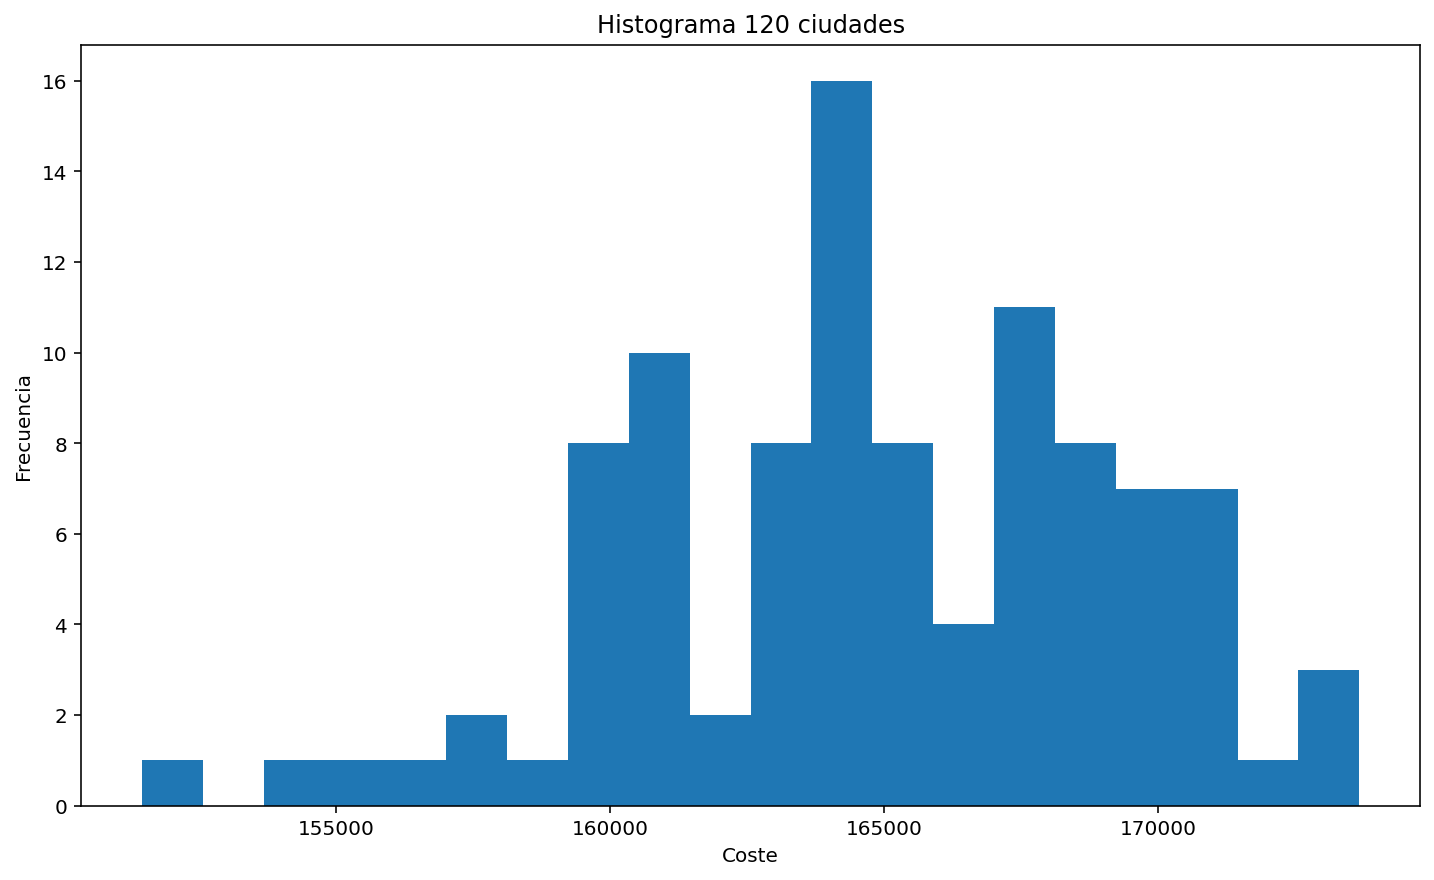

In [14]:
import matplotlib.pyplot as plt

plt.hist(xUS, bins=20)
plt.title('Histograma 120 ciudades')
plt.xlabel('Coste')
plt.ylabel('Frecuencia')
plt.show()

#histograma con la distribución de los resultados obtenidos para las 120 ciudades

#para las 120 ciudades obtenemos un resultado parecido a una campana de Gauss, con una probabilidad más baja de otener la solución óptima 

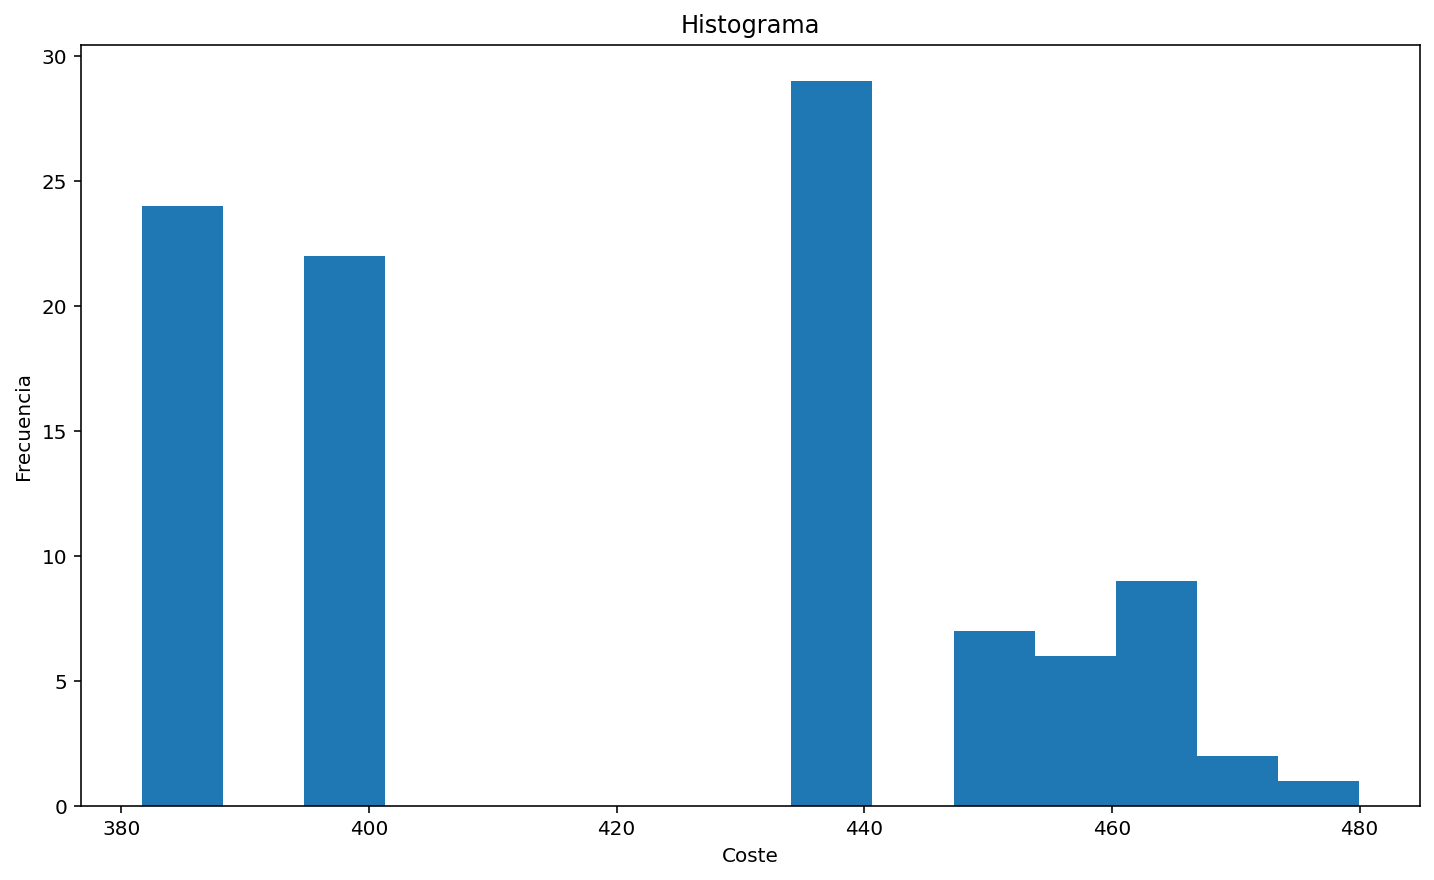

In [15]:
import matplotlib.pyplot as plt

plt.hist(x1, bins=len(set(x1)))
plt.title('Histograma')
plt.xlabel('Coste')
plt.ylabel('Frecuencia')
plt.show()

#con sólo 8 ciudades es difícil ver la tendencia

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)



❓ **Pregunta 2**. ¿Siempre obtienes soluciones óptimas en cada problema? ¿En qué proporción? Muestra cómo has realizado la verificación y explica brevemente los resultados obtenidos.

Notas: sé conservador en tu estrategia para verificar tu implementación, especialmente cuando empleas ficheros de datos grandes como el del problema de las ciudades USA. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite. 



### Ajuste dinámico de temperatura inicial

En tu implementación has establecido la temperatura inicial siguiendo un valor fijo completamente arbitrario. Esto puede no resultar siempre adecuado, y suele ser más conveniente disponer de un ajuste de la temperatura inicial (T0) que tenga en cuenta la instancia del problema a resolver. 

Modifica la implementación anterior para que puedas parametrizar el valor inicial del parámetro de control T0 utilizando la siguiente fórmula:

    𝑇0 = (−𝜇/ln(𝜙))·𝐶(𝑆0), que permite aceptar (con una probabilidad 𝜙) soluciones siguientes que empeoren en μ (tanto por uno) a S0 (esto es, que sean (1+ μ) veces peores).

En la fórmula, C(S0) es el coste de la solución inicial, con valores por defecto 𝜙=0.50 y 𝜇=0.01.



In [13]:
#función para calcular la temperatura inicial teniendo en cuenta un coste inicial, phi y mu
def temperatura_ini(CostIni, phi, mu):
    return (-mu/math.log(phi))*CostIni

In [14]:
#temple simulado, pero calculando la temperatura incial con phi y mu
def TempleSimulado2(phi=0.5, mu=0.01, a=0.0045, L=1, long = 8, filename='./data/grafo8cidades.txt'):
    costes=[]
    iteracion = 1
    Sactual = genera_solucion(longitud=long)
    g = Localizaciones(filename=filename)
    CostAct = coste(g, Sactual)
    costes.append(CostAct)
    #calcula la temperatura inicial en lugar de tener una fija
    T0 = temperatura_ini(CostAct, phi, mu)
    T=T0
    while (iteracion < 1000):
        for cont in range(L):
            Scandidata = intercambio(Sactual)
            CostCand = coste(g, Scandidata)
            DifCoste = CostCand - CostAct
            if( DifCoste < 0):
                Sactual = Scandidata
                CostAct = CostCand
                costes.append(CostAct)
            else:
                aleat = random.random()
                if (aleat < math.exp(-DifCoste/T)):
                    Sactual = Scandidata
                    CostAct = CostCand
                    costes.append(CostAct)
        T = a(T0, iteracion, a)
        iteracion+=1
    return (Sactual, CostAct, costes)

In [19]:
x1=[]
c=0
for i in range(100):
    s = TempleSimulado2()
    x1.append(s[1])
    if (s[1] == 381.6699617675482):
        c+=1
print(c)
#da la óptima el 35% de las veces aprox

31


In [20]:
xUS=[]
cUS=0
for i in range(100):
    s = TempleSimulado2(long=120, filename='./data/US120.txt')
    xUS.append(s[1])
    if (s[1] < 160000): cUS +=1
print(c)
#da resultados óptimos en un porcentaje notablemente más alto que antes
#antes 5-10%
#ahora 30%

31


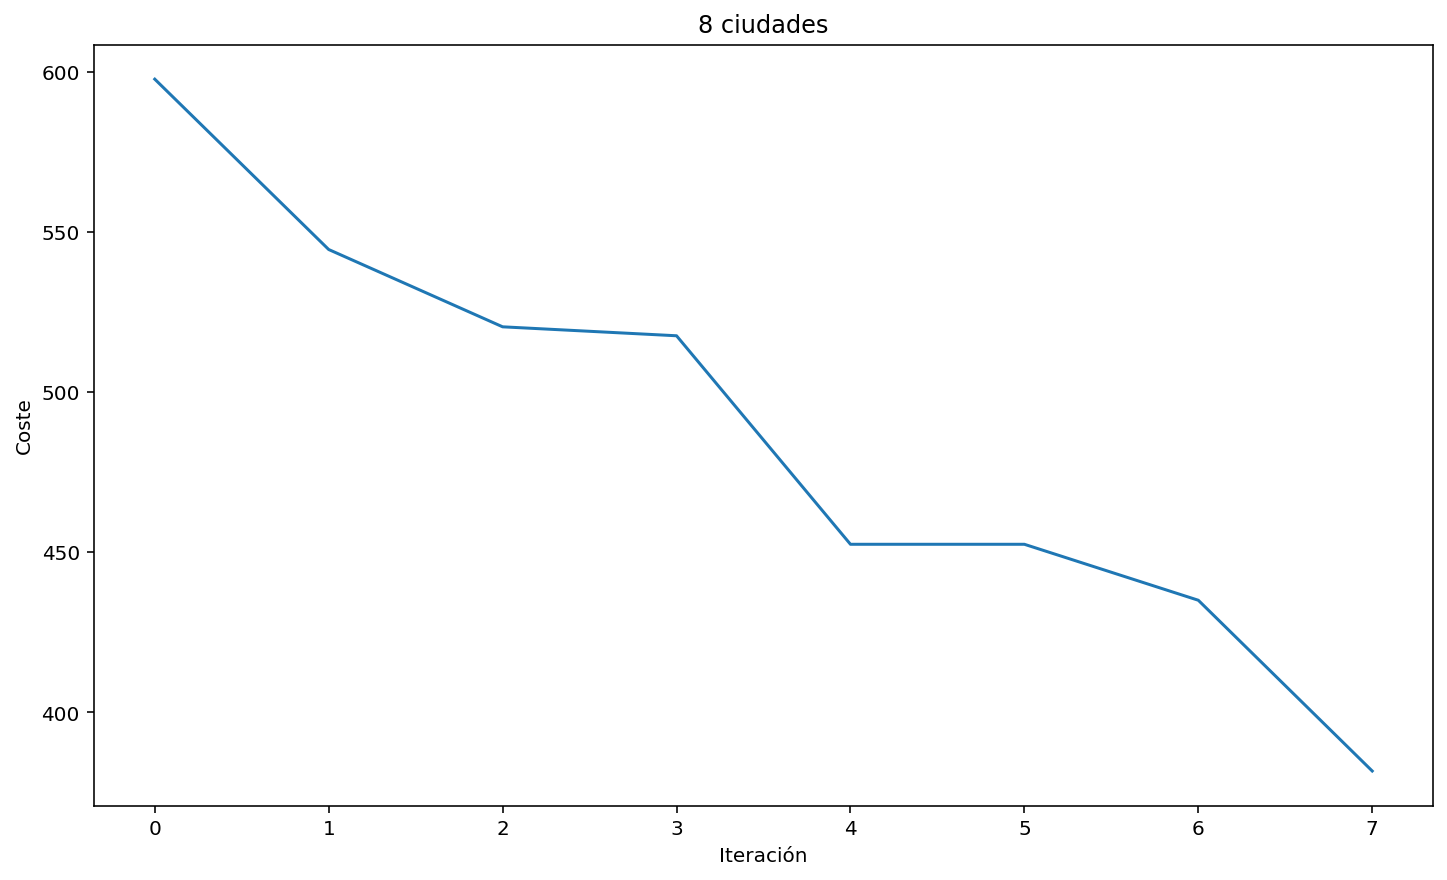

In [21]:
costes = TempleSimulado2()[2]

plt.plot(costes)  # Graficar los costes en el eje y
plt.ylabel('Coste')
plt.title('8 ciudades')
plt.show()

#gráfica de los costes de las soluciones aceptadas hasta la final

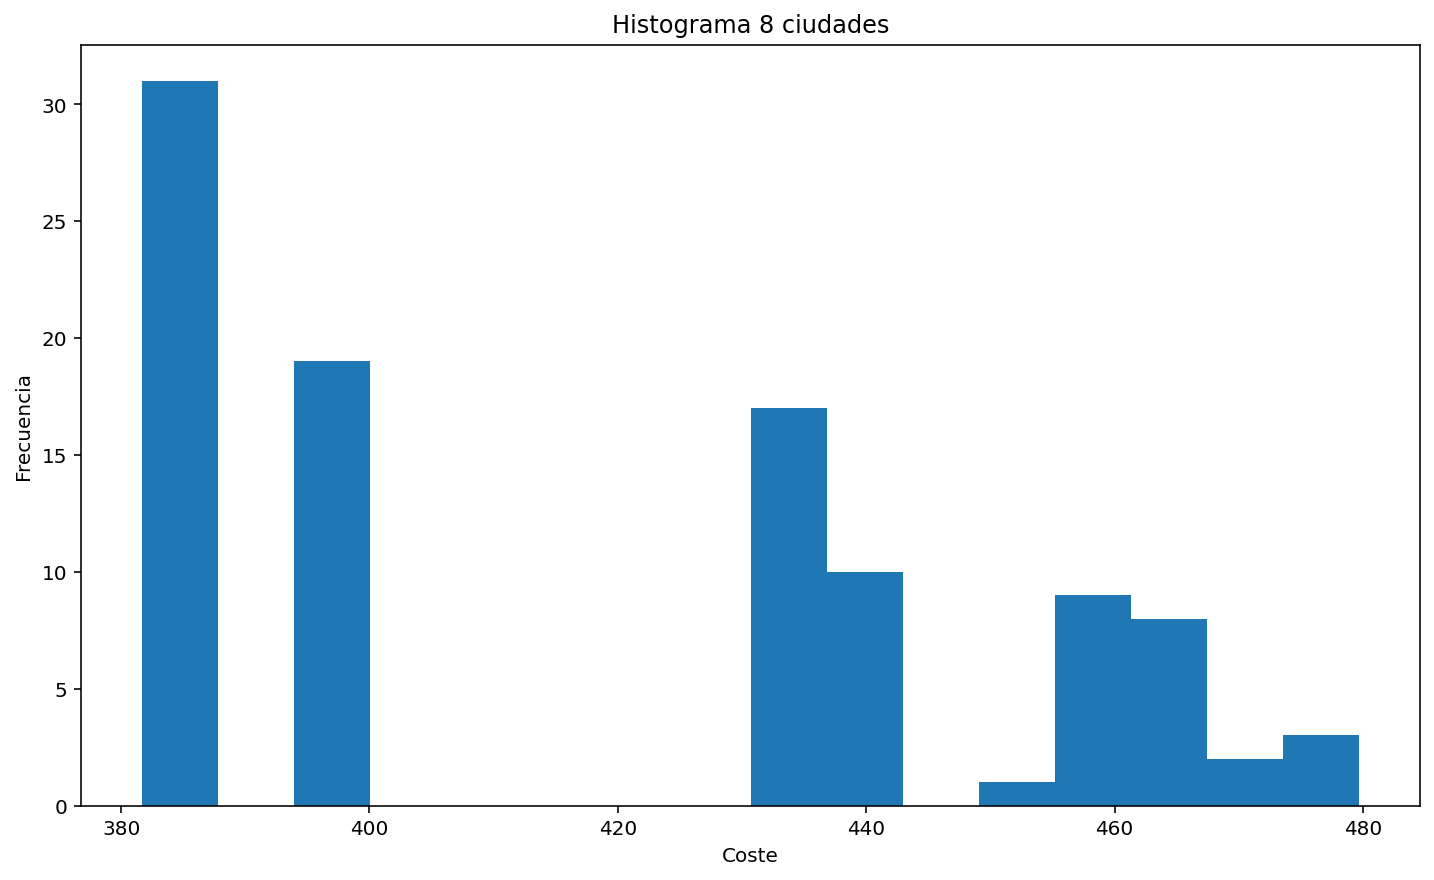

In [22]:
import matplotlib.pyplot as plt

plt.hist(x1, bins=len(set(x1)))
plt.title('Histograma 8 ciudades')
plt.xlabel('Coste')
plt.ylabel('Frecuencia')
plt.show()

170733.001924987


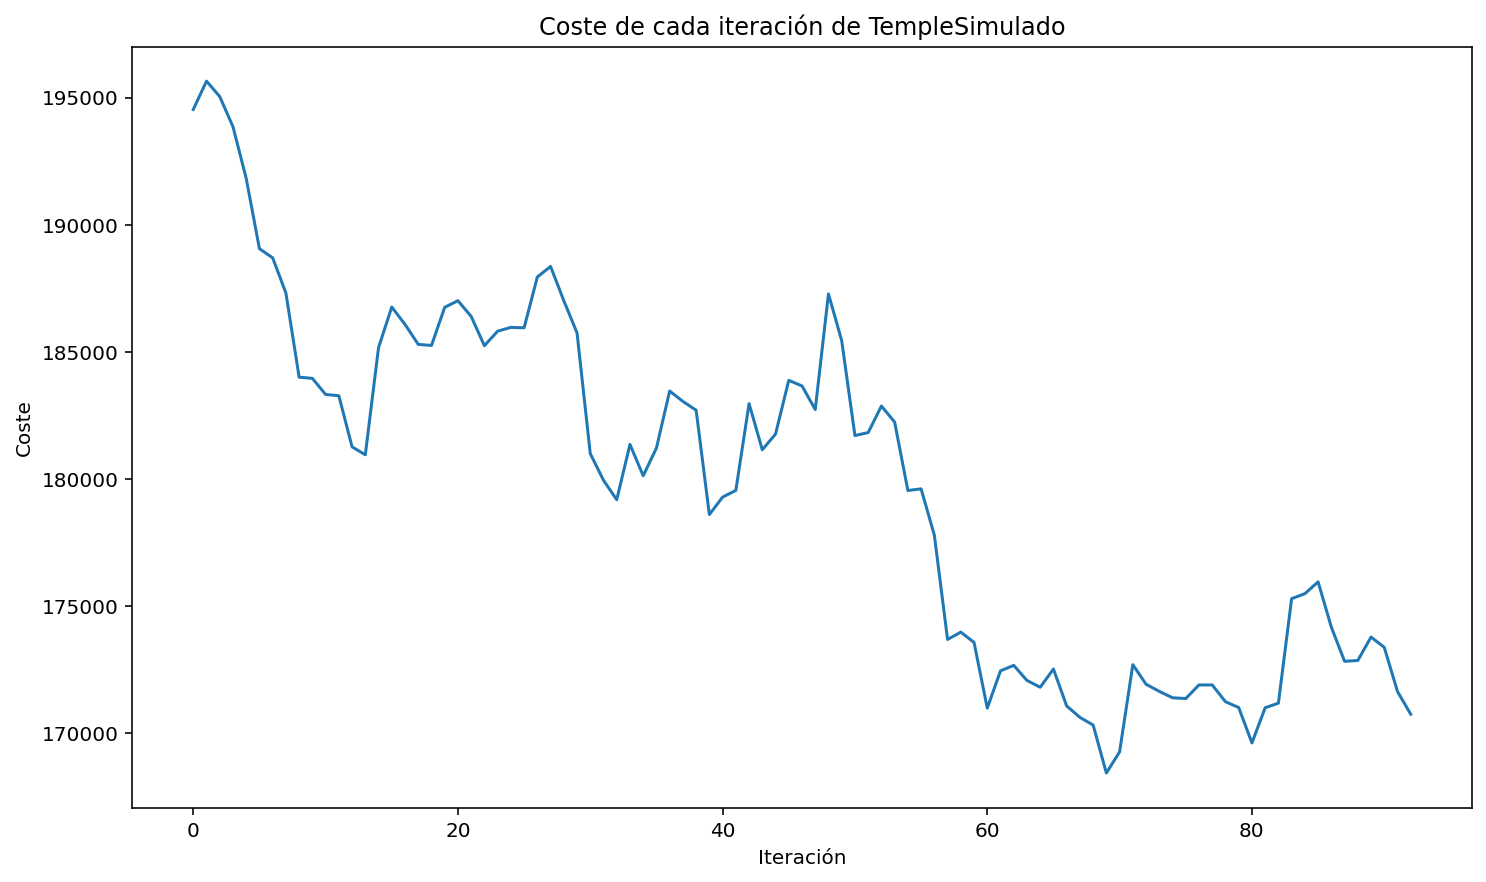

In [23]:
s = TempleSimulado2(long=120, filename='./data/US120.txt')
print(s[1])
costes = s[2]
plt.plot(costes)  # Graficar los costes en el eje y
plt.xlabel('Iteración')
plt.ylabel('Coste')
plt.title('Coste de cada iteración de TempleSimulado')
plt.show()

#gráfica de la evolución del algoritmo
#representa los costes de las soluciones aceptadas
#podemos ver que en algunos casos no termina con la solución de coste más bajo de las que encontró

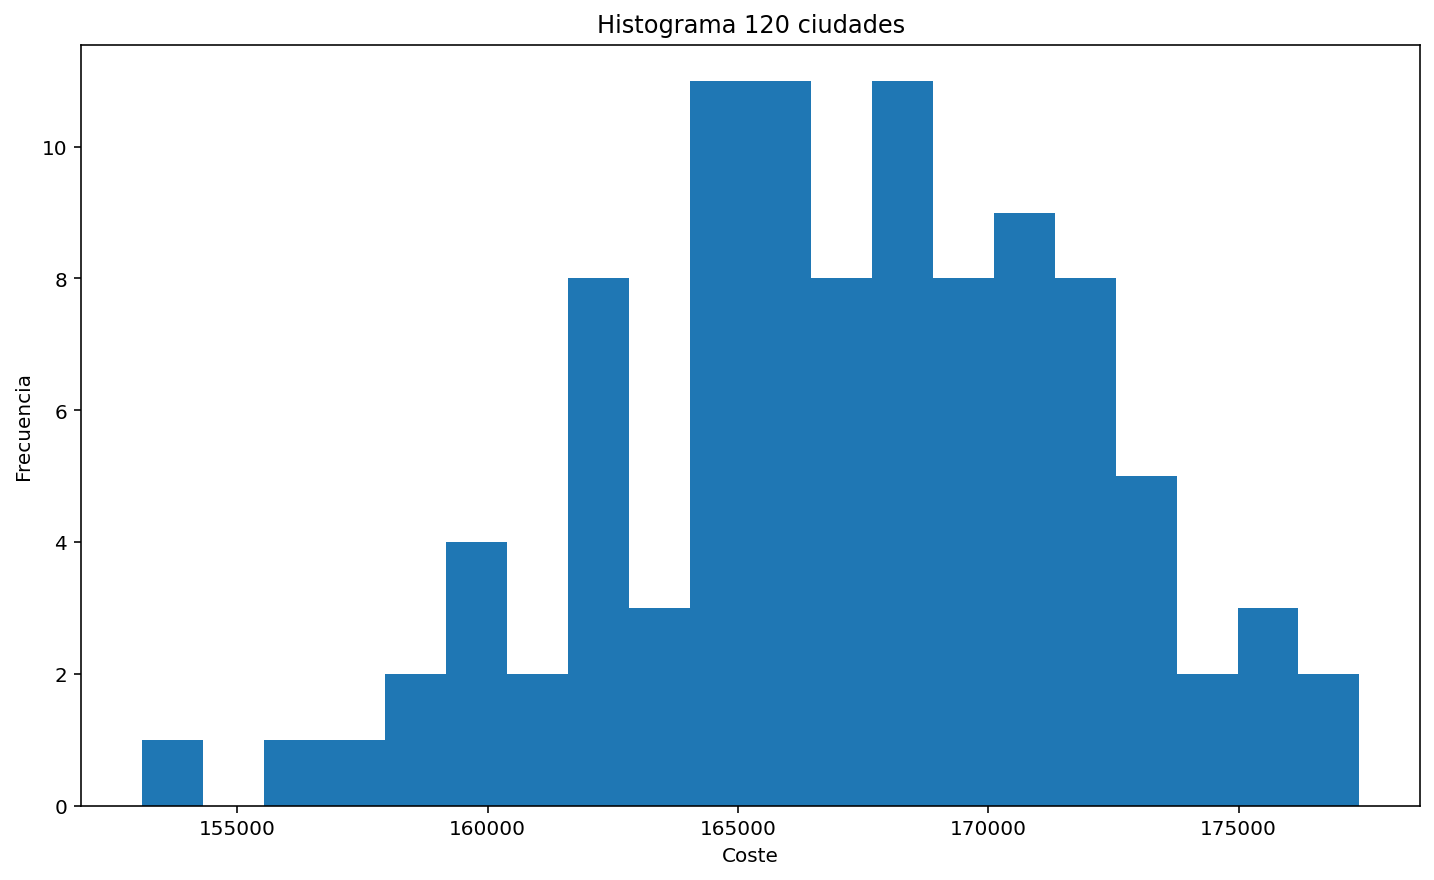

In [24]:
import matplotlib.pyplot as plt

plt.hist(xUS, bins=20)
plt.title('Histograma 120 ciudades')
plt.xlabel('Coste')
plt.ylabel('Frecuencia')
plt.show()

#el histograma de las frecuencias con las que sale cada solución sigue la distribución de Gauss igual que antes
#pero se ve un poco desplazada hacia la izquierda
#esto significa que obtiene soluciones mejores un mayor número de veces que antes

❓ **Pregunta 3.1**. Confecciona una tabla que muestre la relación de 𝐶(𝑆0), 𝜙 y 𝜇 con T0 para los dos problemas utilizados anteriormente (ciudades gallegas y ciudades USA). Entonces, amplia de manera razonada la tabla con variaciones de 𝜙 y 𝜇 para cada uno de los problemas. ¿Qué combinación de 𝜙 y 𝜇 da mayor/menor T0?

❓ **Pregunta 3.2**. Escoge 4 combinaciones variadas de parámetros (incluidos los que regulan el mecanismo de enfriamiento, e.g., 𝜆). Ejecuta el algoritmo de Temple Simulado con esas combinaciones. Guarda los resultados en una celda, y discute los resultados obtenidos en cuanto a la calidad de las soluciones obtenidas.



In [13]:
g8 = Localizaciones(filename='./data/grafo8cidades.txt')
g120 = Localizaciones(filename='./data/US120.txt')

In [14]:
#temple simulado con phi y mu, especificando la solucion inicial
def TempleSimulado3(Sinicial, phi=0.5, mu=0.01, a=0.0045, L=1, long = 8, filename='./data/grafo8cidades.txt'):
    costes=[]
    iteracion = 1
    Sactual = Sinicial
    g = Localizaciones(filename=filename)
    CostAct = coste(g, Sactual)
    costes.append(CostAct)
    #calcula la temperatura inicial en lugar de tener una fija
    T0 = temperatura_ini(CostAct, phi, mu)
    T=T0
    while (iteracion < 1000):
        for cont in range(L):
            Scandidata = intercambio(Sactual)
            CostCand = coste(g, Scandidata)
            DifCoste = CostCand - CostAct
            if( DifCoste < 0):
                Sactual = Scandidata
                CostAct = CostCand
                costes.append(CostAct)
            else:
                aleat = random.random()
                if (aleat < math.exp(-DifCoste/T)):
                    Sactual = Scandidata
                    CostAct = CostCand
                    costes.append(CostAct)
        T = alfa(T0, iteracion, a)
        iteracion+=1
    return (Sactual, CostAct, costes)

Lo que queremos es que inicialmente se acepte casi cualquier transición, para darle un carácter explorativo al algoritmo. Por tanto, tenemos que establecer unos valores de phi y mu que consigan la temperatura inicial que permita esto.

Temperatura inicial:  208.88826957341075
Coste final:  471.7668572221668
Temperatura inicial:  104.44413478670538
Coste final:  452.44294134521556
Temperatura inicial:  78.33310109002902
Coste final:  399.13723055374794
Temperatura inicial:  52.22206739335269
Coste final:  438.5138410466488
Temperatura inicial:  10.444413478670537
Coste final:  399.137230553748
Temperatura inicial:  5.2222067393352685


Coste final:  466.3154060063322


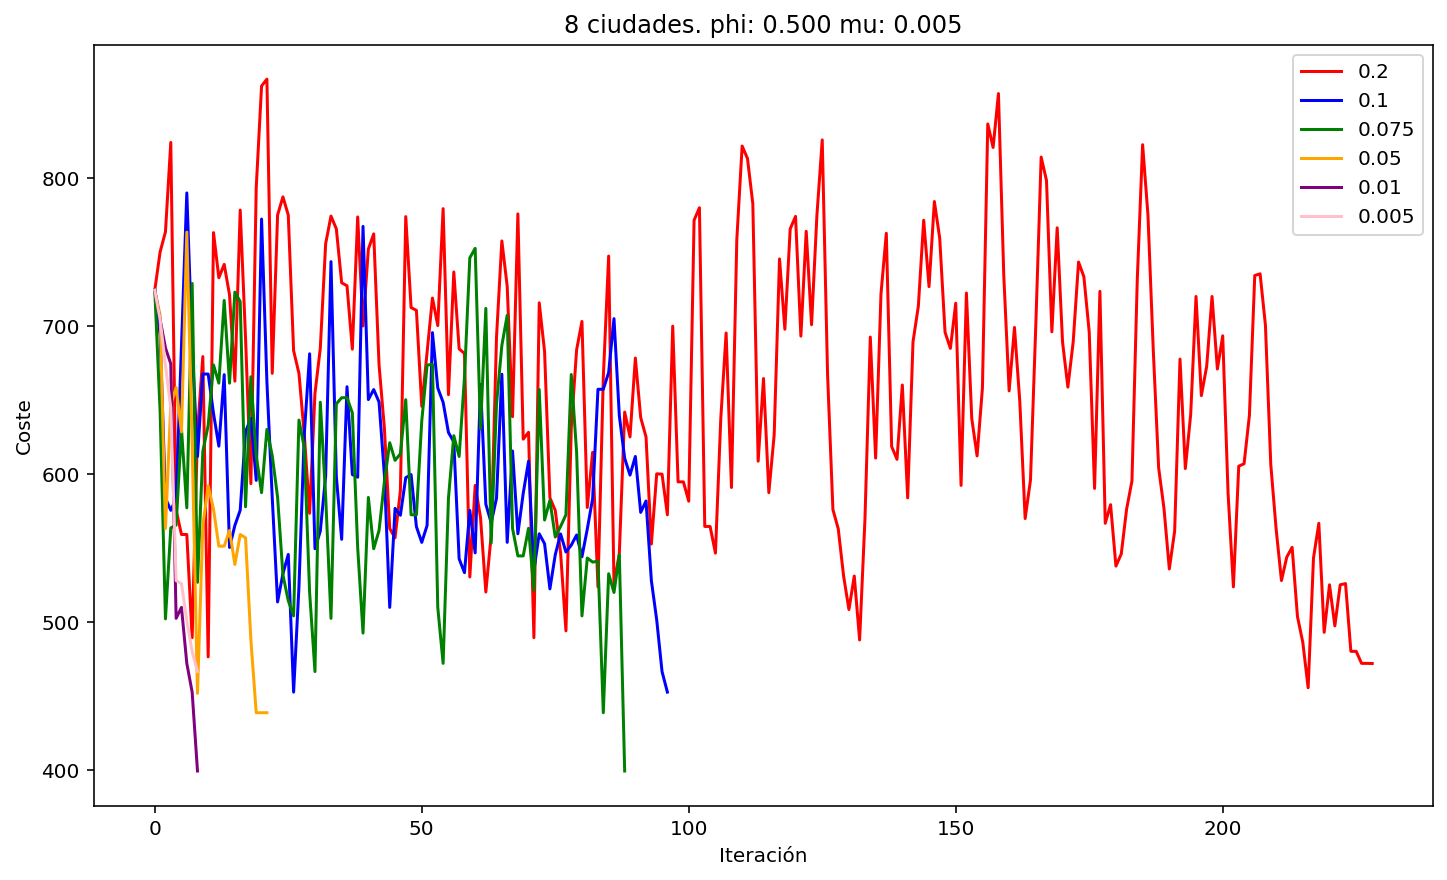

Temperatura inicial:  54885.08647452944
Coste final:  173275.43621112843
Temperatura inicial:  27442.54323726472
Coste final:  161414.23111760186
Temperatura inicial:  20581.90742794854


Coste final:  166950.27035924984
Temperatura inicial:  13721.27161863236
Coste final:  164950.00701225435
Temperatura inicial:  2744.254323726472
Coste final:  162787.90022512793
Temperatura inicial:  1372.127161863236


Coste final:  169461.38115087422


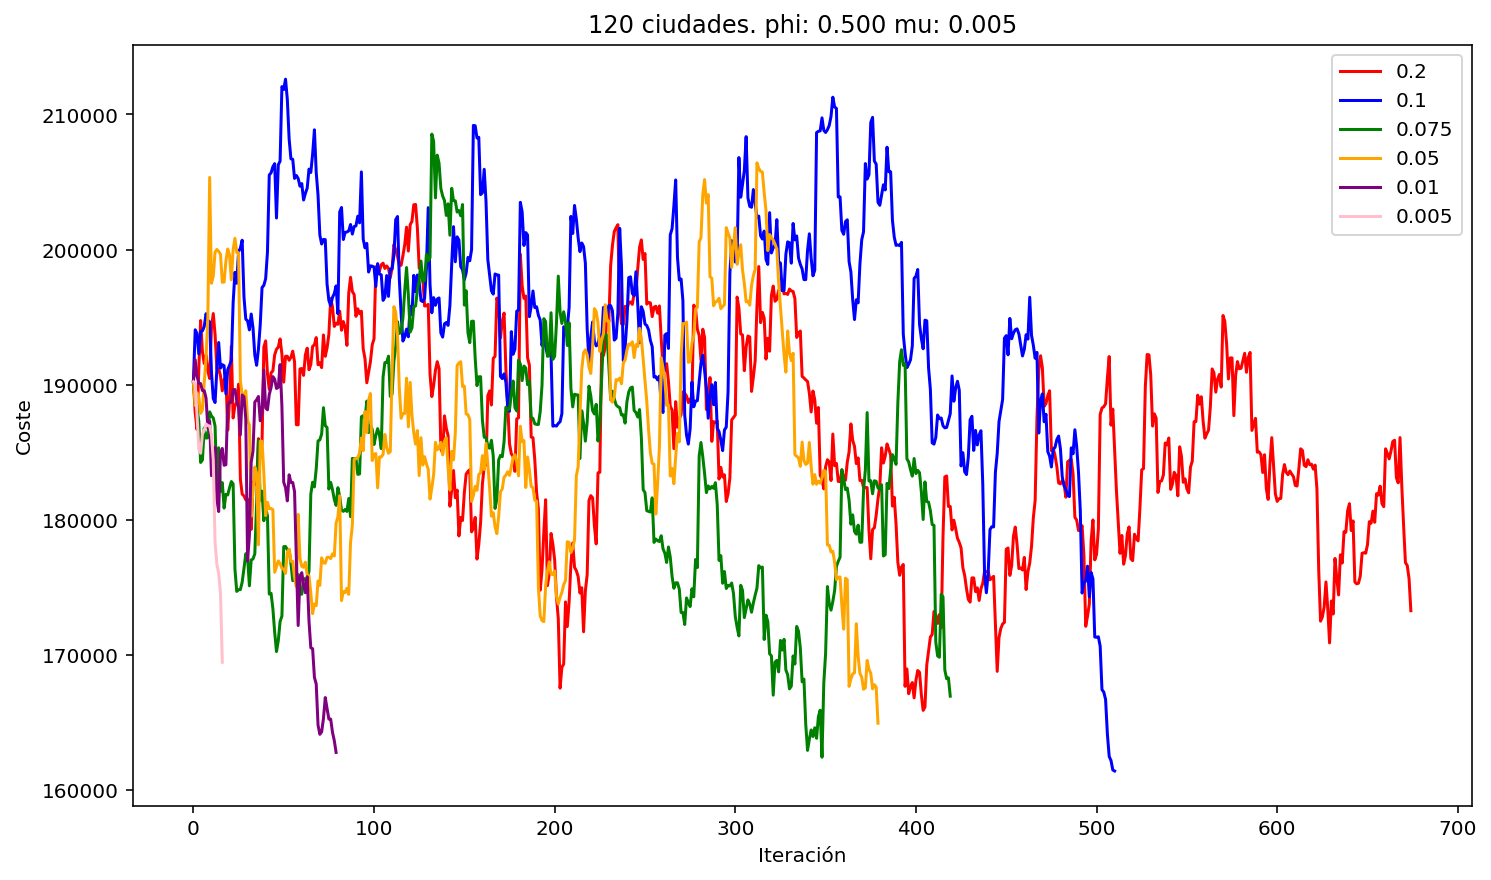

In [61]:
print('VARIACIÓN DE MU')

import matplotlib.pyplot as plt

mus = [0.2, 0.1, 0.075, 0.05, 0.01, 0.005]

sol = []
costos = []

for m in mus:
    sol = TempleSimulado3([0, 7, 3, 1, 4, 6, 5, 2, 0], phi=0.5, mu=m)
    print('Coste final: ', sol[1])
    costos.append(sol[2])

colores = ['red', 'blue', 'green', 'orange', 'purple', 'pink']

for i, costo in enumerate(costos):
    plt.plot(costo, color=colores[i])

plt.xlabel('Iteración')
plt.ylabel('Coste')
titulo = "8 ciudades. phi: {:.3f} mu: {:.3f}".format(0.5, mus[-1])
plt.title(titulo)
plt.legend(mus)
plt.show()

costos = []

#USA
for m in mus:
    #establecemos la solución inicial para poder hacer comparaciones más precisas
    S0_120 = [0, 96, 3, 80, 34, 107, 8, 16, 53, 43, 83, 26, 2, 18, 50, 52, 75, 116, 7, 17, 74, 23, 101, 108, 115, 78, 71, 109, 42, 100, 98, 21, 113, 46, 94, 55, 29, 92, 58, 82, 22, 73, 119, 31, 14, 44, 39, 12, 35, 88, 9, 37, 68, 87, 111, 30, 76, 86, 114, 1, 10, 117, 32, 13, 62, 59, 15, 28, 65, 97, 118, 110, 67, 48, 77, 49, 64, 4, 20, 6, 79, 60, 45, 106, 91, 19, 57, 102, 56, 104, 25, 11, 27, 85, 66, 47, 33, 84, 54, 36, 5, 93, 41, 81, 24, 69, 99, 38, 70, 72, 90, 63, 89, 103, 51, 112, 95, 40, 61, 105, 0]
    sol = TempleSimulado3(S0_120, phi=0.5, mu=m, long=120, filename='./data/US120.txt')
    print('Coste final: ', sol[1])
    costos.append(sol[2])

for i, costo in enumerate(costos):
    plt.plot(costo, color=colores[i])

plt.xlabel('Iteración')
plt.ylabel('Coste')
titulo = "120 ciudades. phi: {:.3f} mu: {:.3f}".format(0.5, mus[-1])
plt.title(titulo)
plt.legend(mus)
plt.show()

VARIACION DE PHI
Temperatura inicial:  32.44331154857695
Coste final:  451.58543891890463
Temperatura inicial:  10.444413478670537
Coste final:  381.6699617675482
Temperatura inicial:  6.0130226607534825
Coste final:  399.137230553748
Temperatura inicial:  3.1440817441970186
Coste final:  399.13723055374794


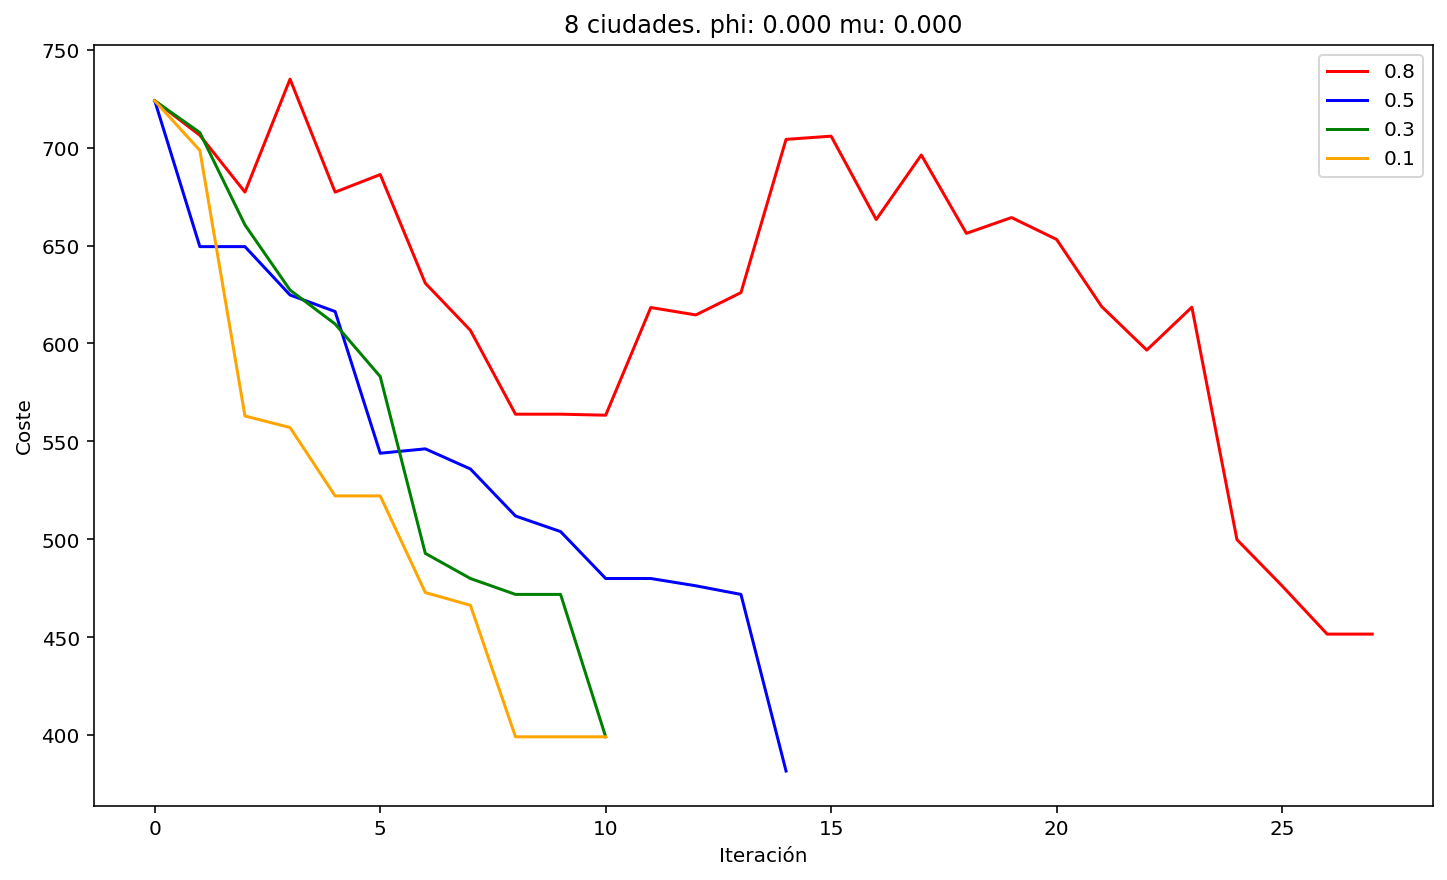

Temperatura inicial:  8524.432527973815
Coste final:  168405.17792002767
Temperatura inicial:  2744.254323726472
Coste final:  159660.3166514125
Temperatura inicial:  1579.9128854039236
Coste final:  171242.2357898323


Temperatura inicial:  826.1028671722415
Coste final:  157856.3969716999


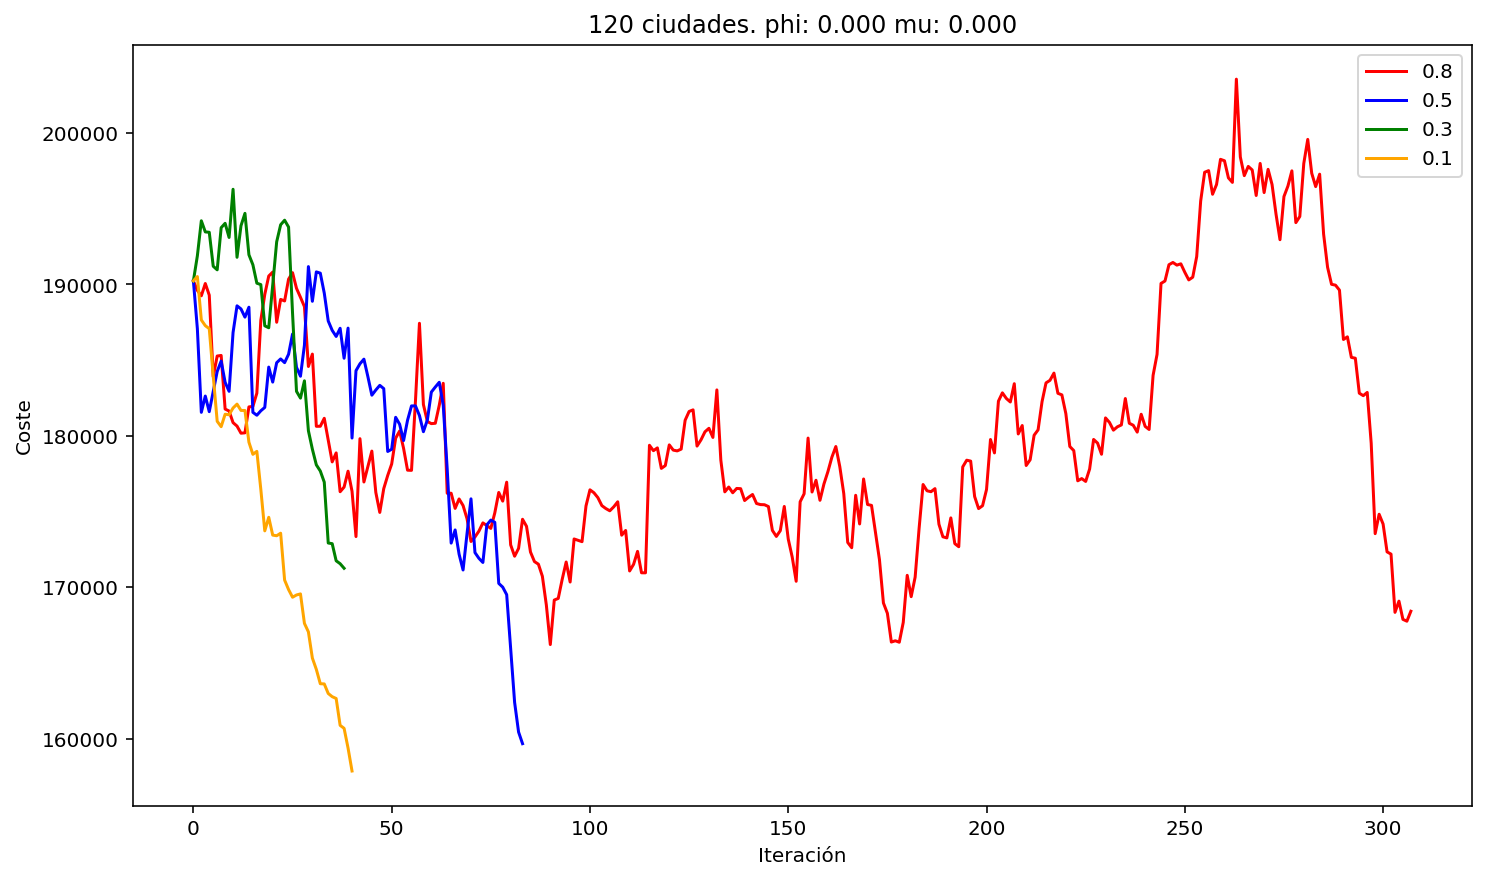

In [32]:
print('VARIACION DE PHI')

import matplotlib.pyplot as plt
phis = [0.8, 0.5, 0.3, 0.1]
#mus = [0.01]

sol = []
costos = []

for p in phis:
    sol = TempleSimulado3([0, 7, 3, 1, 4, 6, 5, 2, 0], phi=p, mu=0.01)
    print('Coste final: ', sol[1])
    costos.append(sol[2])

colores = ['red', 'blue', 'green', 'orange', 'purple', 'pink']

for i, costo in enumerate(costos):
    plt.plot(costo, color=colores[i])

plt.xlabel('Iteración')
plt.ylabel('Coste')
titulo = "8 ciudades. phi: {:.3f} mu: {:.3f}".format(0, 0)
plt.title(titulo)
plt.legend(phis)
plt.show()

costos= []

for p in phis:
    S0_120 = [0, 96, 3, 80, 34, 107, 8, 16, 53, 43, 83, 26, 2, 18, 50, 52, 75, 116, 7, 17, 74, 23, 101, 108, 115, 78, 71, 109, 42, 100, 98, 21, 113, 46, 94, 55, 29, 92, 58, 82, 22, 73, 119, 31, 14, 44, 39, 12, 35, 88, 9, 37, 68, 87, 111, 30, 76, 86, 114, 1, 10, 117, 32, 13, 62, 59, 15, 28, 65, 97, 118, 110, 67, 48, 77, 49, 64, 4, 20, 6, 79, 60, 45, 106, 91, 19, 57, 102, 56, 104, 25, 11, 27, 85, 66, 47, 33, 84, 54, 36, 5, 93, 41, 81, 24, 69, 99, 38, 70, 72, 90, 63, 89, 103, 51, 112, 95, 40, 61, 105, 0]
    sol = TempleSimulado3(S0_120, phi=p, mu=0.01, long=120, filename='./data/US120.txt')
    print('Coste final: ', sol[1])
    costos.append(sol[2])

for i, costo in enumerate(costos):
    plt.plot(costo, color=colores[i])

plt.xlabel('Iteración')
plt.ylabel('Coste')
titulo = "120 ciudades. phi: {:.3f} mu: {:.3f}".format(0, 0)
plt.title(titulo)
plt.legend(phis)
plt.show()


In [16]:
c8 = coste(g8, [0, 7, 3, 1, 4, 6, 5, 2, 0])
c120 = coste(g120, [0, 96, 3, 80, 34, 107, 8, 16, 53, 43, 83, 26, 2, 18, 50, 52, 75, 116, 7, 17, 74, 23, 101, 108, 115, 78, 71, 109, 42, 100, 98, 21, 113, 46, 94, 55, 29, 92, 58, 82, 22, 73, 119, 31, 14, 44, 39, 12, 35, 88, 9, 37, 68, 87, 111, 30, 76, 86, 114, 1, 10, 117, 32, 13, 62, 59, 15, 28, 65, 97, 118, 110, 67, 48, 77, 49, 64, 4, 20, 6, 79, 60, 45, 106, 91, 19, 57, 102, 56, 104, 25, 11, 27, 85, 66, 47, 33, 84, 54, 36, 5, 93, 41, 81, 24, 69, 99, 38, 70, 72, 90, 63, 89, 103, 51, 112, 95, 40, 61, 105, 0])
print(c8, c120)
phis = [0.8, 0.5, 0.3, 0.1]
mus = [0.2, 0.075, 0.05, 0.005]

723.9515755342773 190217.21472304434


**Pregunta 3.2**

In [19]:
sol1 = TempleSimulado3(genera_solucion(120), phi = 0.75, mu = 0.085, a = 0.055, L=1, long = 120, filename='./data/US120.txt')
sol2 = TempleSimulado3(genera_solucion(120), phi = 0.65, mu=0.075, a = 0.055, L=50, long = 120, filename='./data/US120.txt')
sol3 = TempleSimulado3(genera_solucion(120), phi = 0.65, mu=0.075, a=0.001, L = 1, long = 120, filename='./data/US120.txt')
sol4 = TempleSimulado3(genera_solucion(120), phi=0.4, mu=0.01, a = 0.001, L=50, long = 120, filename='./data/US120.txt')
for i in range(10):
    aux = TempleSimulado3(genera_solucion(120), phi = 0.75, mu = 0.085, a = 0.055, L=1, long = 120, filename='./data/US120.txt')
    if (aux[1] < sol1[1]):
        sol1 = aux
    aux = TempleSimulado3(genera_solucion(120), phi = 0.65, mu=0.075, a = 0.055, L=50, long = 120, filename='./data/US120.txt')
    if (aux[1] < sol2[1]):
        sol2 = aux
    aux = TempleSimulado3(genera_solucion(120), phi = 0.65, mu=0.075, a=0.001, L = 1, long = 120, filename='./data/US120.txt')
    if (aux[1] < sol3[1]):
        sol3 = aux
    aux = TempleSimulado3(genera_solucion(120), phi=0.4, mu=0.01, a = 0.001, L=50, long = 120, filename='./data/US120.txt')
    if (aux[1] < sol4[1]):
        sol4 = aux

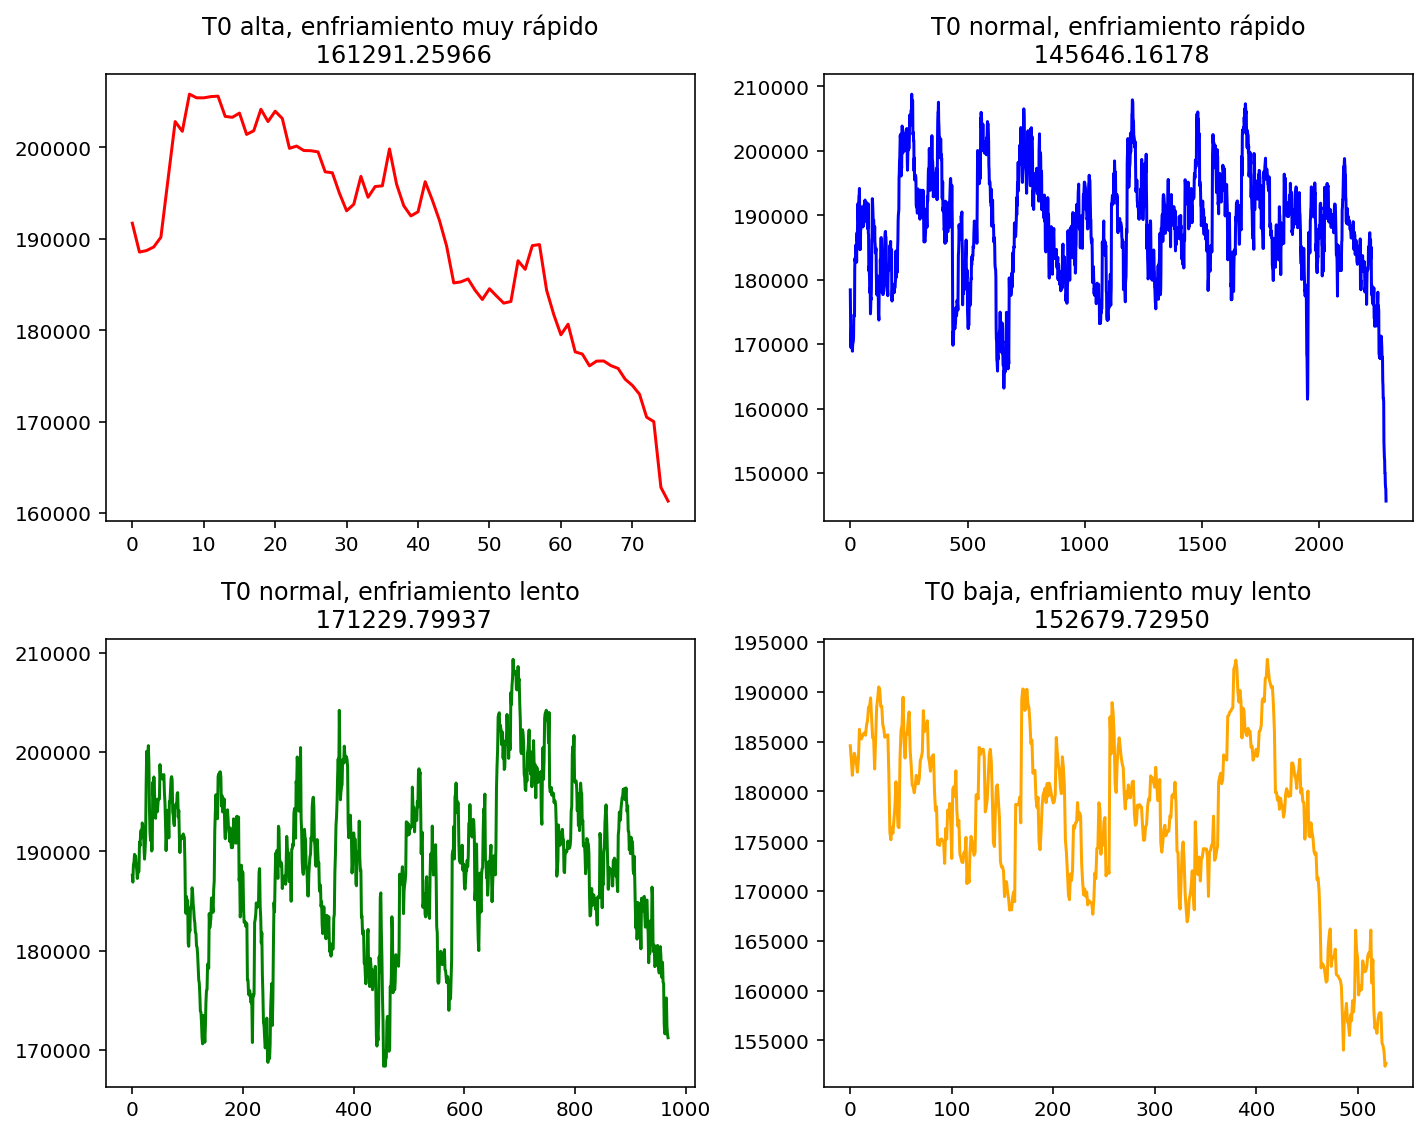

In [20]:
import matplotlib.pyplot as plt

colores = ['red', 'blue', 'green', 'orange']

costos = [sol1[2], sol2[2], sol3[2], sol4[2]]

plt.figure(figsize=(10, 8))

titulos = ["T0 alta, enfriamiento muy rápido\n {:.5f}".format(sol1[1]), "T0 normal, enfriamiento rápido\n {:.5f}".format(sol2[1]), "T0 normal, enfriamiento lento\n {:.5f}".format(sol3[1]), "T0 baja, enfriamiento muy lento\n {:.5f}".format(sol4[1])]

for i, costo in enumerate(costos):
    plt.subplot(2, 2, i+1)
    plt.plot(costo, color=colores[i])
    plt.title(titulos[i])

plt.tight_layout()
plt.show()

Para las combinaciones de parámetros hemos elegido como lambdas 0.055 y 0.001. La primera causa un enfriamiento muy rápido, y la segunda uno muy lento. Además, para cada una hemos establecido una velocidad de enfriamiento L=1 y L =50. Aumentando L conseguimos disminuir la velocidad a la que enfría la temperatura.
Para los casos de enfriamiento muy rápido (lambda = 0.055, L=1) y de enfriamiento muy lento (lambda=0.001, L=50), se ha forzado a que la temperatura inicial sea más alta y más baja, respectivamente. Esto lo hemos echo mediante los valores de phi y mu. Para los casos intermedios se han conservado unos valores de phi y mu estables.

Cada caso lo hemos ejecutado 11 veces, y se ha elegido y representado aquella ejecución que ha devuelto la solución de menor coste de todas ellas para cada caso. Estas serán las ejecuciónes que compararemos a continuación.

Un dato a comentar es que en los casos 2 y 4, el número de soluciones generadas es 50 veces mayor que para los casos 1 y 3, puesto que contamos con un bucle de 50 iteraciones de generación y aceptación o no de soluciones sin enfriamiento, contenido dentro del bucle exterior de 1000 iteraciones con enfriamiento. 

En las gráficas podemos ver que en el caso de partir de una temperatura más elevada y con un enfriamiento muy rápido, el número de soluciones aceptadas es mucho menor que en los otros casos, con menos de 80 frente a los otros casos, en los que van de 520 a casi 2000. Sin embargo, si tenemos en cuenta el dato anterior (para las gráficas 2 y 4 se han generado 50.000 posibles soluciones), el porcentaje de aceptación del primer caso es de un 7.5%, mientras que en el caso 2 de un 5% y en el caso 4 de un 1.1%.

Este porcentaje de aceptación tan bajo para el último caso se debe a que a pesar de que el enfriamiento es muy lento, partimos de una temperatura más baja que en los otros casos, lo que disminuye la probabilidad de aceptación de una solución peor que la actual. Además, se puede ver en la gráfica que los casos de empeoramiento aceptados nunca son con mucha diferencia de coste, lo que resulta en que es el caso en el que la peor solución encontrada tiene el coste más bajo. En general, la combinación de estos parámetros resulta en bastante poca exploración, centrándose en la explotación de las regiones conocidas.

De vuelta al caso 1, de las soluciones aceptadas, la mayor parte de las aceptadas peores se concentra al principio de la ejecución, en las 10 primeras, cuando la temperatura aún está suficientemente alta como para que la probabilidad de aceptación de peores con una diferencia de coste grande sea suficientemente alta. Como el enfriamiento es muy rápido, la probabilidad de aceptación de peores va disminuyendo, con lo que a medida que avanza prácticamente sólo acepta algunas en las que la diferencia de coste no es mucha. En ese caso tenemos exploración al principio de la ejecución, que da paso a una mayor explotación más adelante.

En cuanto al caso 3, partiendo de una temperatura intermedia, con un enfriamiento lento y, al igual que en el anterior, con 1000 iteraciones, podemos darnos cuenta de que el porcentaje de soluciones generadas aceptadas es de casi el 100%. Aquí, a pesar de que la temperatura se enfría tras cada iteración, el enfriamiento es muy leve, por lo que durante la ejecución no le da tiempo a enfriarse lo suficiente como para disminuir de manera notable la probabilidad de aceptación de soluciones peores. Por eso, sigue explorando el espacio de soluciones hasta prácticamente el final, sin explotar cada zona. Esto resulta en ser el caso que devuelve la solución final con el coste más elevado, es decir, la peor.

Finalmente, la combinación de parámetros que ha devuelto la mejor solución ha sido el caso 2, que parte de una temperatura intermedia y que enfría de manera rápida cada 50 soluciones generadas, aceptadas o no. Durante la primera mitad de este podemos ver que hay varios picos bruscos en los que se aceptan soluciones peores, con lo que realiza una buena exploración del espacio de soluciones. A medida que avanza, la temperatura se va enfriando más y más, aceptando muchas menos soluciones peores y dedicándose sobre todo a explotar las zonas presentes. Esto es lo que hace que esta combinación sea la mejor de las elegidas, lo que se ve representado en las soluciones finales. 

 
## P1.2: Mejoras del algoritmo de Temple Simulado

En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo con lo visto en las clases expositivas. Podrá modificarse cualquiera de los siguientes parámetros u operadores:
- El valor inicial del parámetro de control (T0).
- El mecanismo de enfriamiento.
- La velocidad de enfriamiento.
- El mecanismo de selección de las soluciones candidatas
- El criterio de parada

**Importante**: Debes mantener una implementación de la versión básica que pueda ser ejecutada en la evaluación. Así que se recomienda que la implementación del algoritmo con las mejoras sea implementada en otra función reservada para la versión mejorada. 

❓ **Pregunta 4**. Implementa un laboratorio para evaluar el impacto de las mejoras consideradas. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? ¿Cuáles no parecen haber funcionado tan bien como esperabas y por qué?  Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas o no para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.

**Importante**: Aunque puedes obtener tantas celdas de ejecución de laboratorio y resultados como necesites, tu informe final en respuestas a la pregunta 4 no debería superar las 1200 palabras.


In [35]:
#función para calcular mu según un coste máximo dado y el coste de la solución inicial
def calculo_mu(cmax, cS0):
    return ((cmax - cS0) / cS0)

In [82]:
#función del temple simulado calculando mu, con velocidad de enfriamiento controlada por max_vecinos y max_exitos, y criterio de parada con el número de éxitos
def SA_Mejora1(phi=0.8, mu=0, max_vecinos=50, a=0.0045, long = 120, cmax=210000, filename='./data/US120.txt'):
    costes=[]
    temperaturas = []
    iteracion = 1
    g = Localizaciones(filename=filename)
    #se genera la solucion incial
    Sactual = genera_solucion(longitud=long)
    CostAct = coste(g, Sactual)
    
    #si no se estableció como argumento un mu diferente, se calcula
    if (mu == 0):
        mu = calculo_mu(cmax, CostAct)
        
    costes.append(CostAct)
    #calcula la temperatura inicial
    T0 = temperatura_ini(CostAct, phi, mu)
    temperaturas.append(T0)
    #print('Temperatura inicial: ', T0)
    T=T0
    
    #máximo de vecinos aceptados por iteración
    max_exitos = 0.1*max_vecinos
    #contador de soluciones aceptadas
    n_exitos = 0
    
    while (1):
        for cont in range(max_vecinos):
            Scandidata = intercambio(Sactual)
            CostCand = coste(g, Scandidata)
            DifCoste = CostCand - CostAct
            if( DifCoste < 0):
                Sactual = Scandidata
                CostAct = CostCand
                costes.append(CostAct)
                n_exitos += 1 #incrementamos el contador de soluciones aceptadas
            else:
                aleat = random.random()
                if (aleat < math.exp(-DifCoste/T)):
                    Sactual = Scandidata
                    CostAct = CostCand
                    costes.append(CostAct)
                    n_exitos += 1 #incrementamos el contador de soluciones aceptadas
            if (n_exitos == max_exitos): break #si se aceptaron el número máximo de soluciones, se termina la iteración y se enfría
        if (n_exitos == 0): break #si en toda la iteración no se aceptó ninguna solución, finaliza el algoritmo
        else: n_exitos = 0 #si no, se inicializa el contador
        T = alfa(T0, iteracion, a)
        temperaturas.append(T)
        iteracion+=1
    #print('Iteraciones: ', iteracion)
    return (Sactual, CostAct, costes, temperaturas)

Coste final:  155393.79803791954


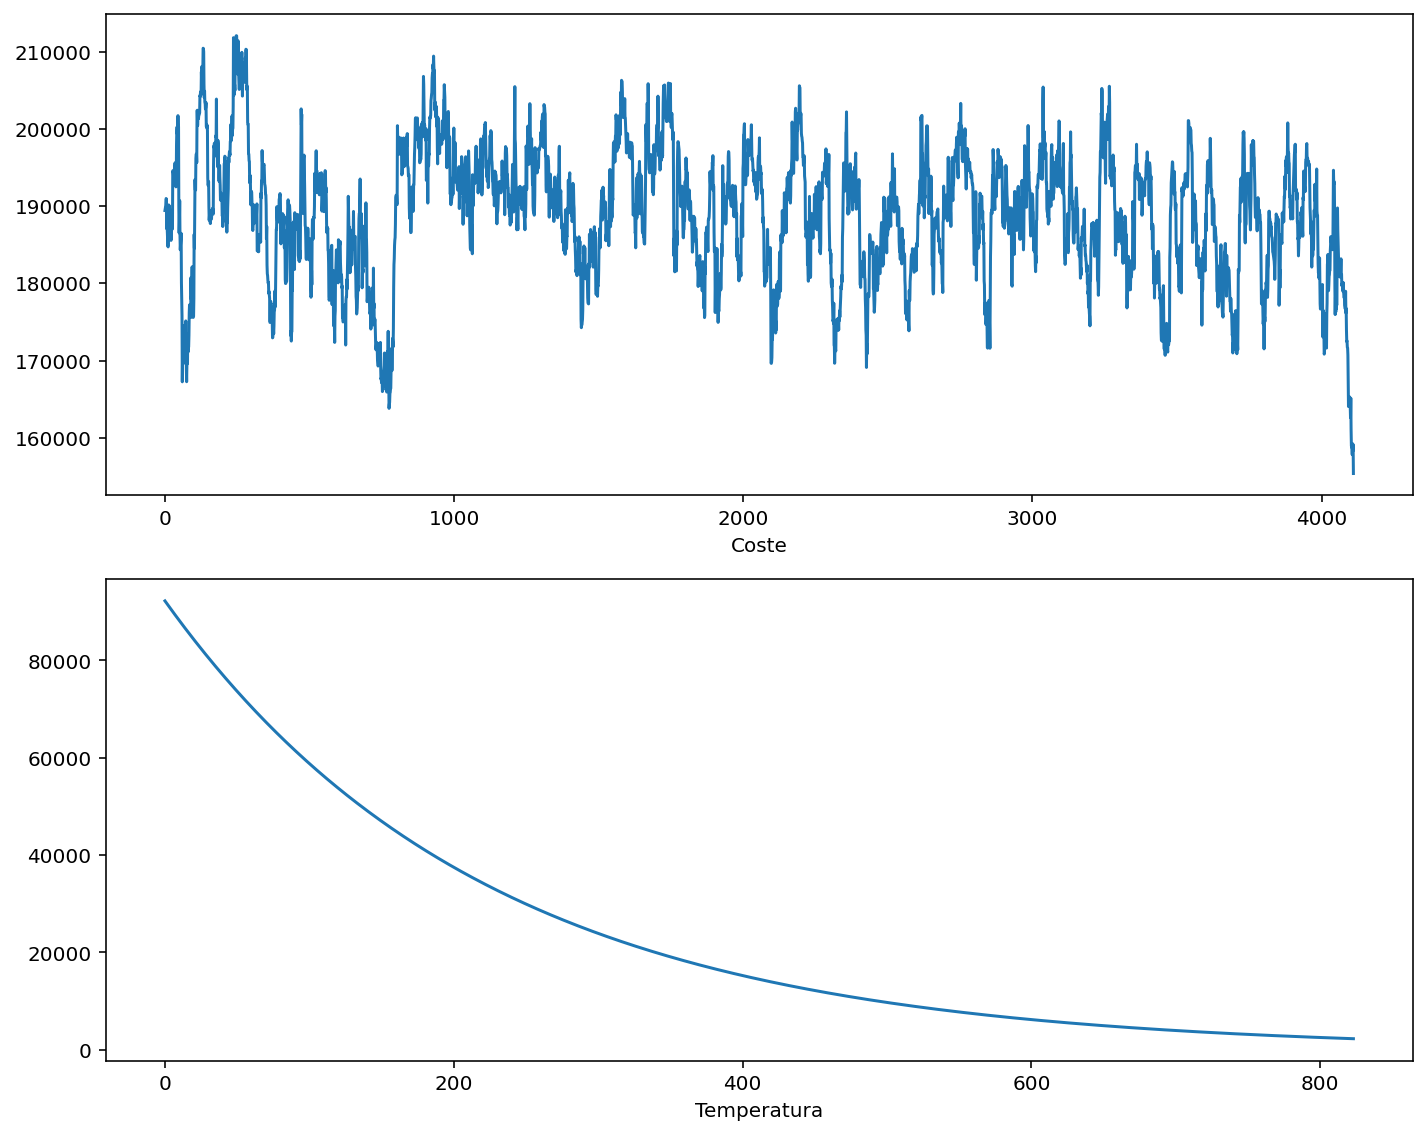

In [96]:
import matplotlib.pyplot as plt
sol = SA_Mejora1()

for i in range(10):
    aux = SA_Mejora1()
    if (aux[1] < sol[1]):
        sol = aux
print('Coste final: ', sol[1])

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(sol[2])
plt.xlabel('Coste')

plt.subplot(2, 1, 2)
plt.plot(sol[3])
plt.xlabel('Temperatura')

plt.tight_layout()
plt.show()


En el caso anterior podemos ver que devuelve una buena solución, pero la mayor parte de las veces necesita bastantes iteraciones hasta converger, puesto que una gran parte de la ejecución realiza más exploración que explotación. Entre otras cosas, esto depende en gran medida de la velocidad de enfriamiento. A continuación vamos a ver diferentes mecanismos de enfriamiento para ver cual sería el más adecuado. Lo que estamos buscando es un mecanismo de enfriamiento rápido porque partimos de una temperatura alta para que explore el espacio de soluciones, y para luego intensificar bajando la temperatura y la probabilidad de aceptar soluciones peores.

In [51]:
def boltzmann(t0, k):
    return t0/(1+math.log10(k))
def cauchy_modif(t0, k, m, tf, tk):
    b = (t0 - tf)/(m*t0*tf)
    return (tk/(1+b*tk))

En el caso del criterio de Boltzmann no nos interesa porque para este problema el enfriamiento sería muy lento y hace que se necesiten muchas más iteraciones hasta converger, lo que conduce a un peor rendimiento.
El esquema de Cauchy modificado tampoco lo utilizaremos puesto que no estamos trabajando con una temperatura final establecida.

In [52]:
def cauchy(t0, k):
    return t0/(1+k)
def proporcional (alf, tk):
    return alf*tk

In [77]:
#función del temple simulado con mejoras 1 + funciones de enfriamiento 
def SA_MejoraCauchy(phi=0.8, mu=0, max_vecinos=50, long = 120, cmax=210000, filename='./data/US120.txt'):
    costes=[]
    temperaturas = []
    iteracion = 1
    g = Localizaciones(filename=filename)
    #se genera la solucion incial
    Sactual = genera_solucion(longitud=long)
    CostAct = coste(g, Sactual)
    
    #si no se estableció como argumento un mu diferente, se calcula
    if (mu == 0):
        mu = calculo_mu(cmax, CostAct)
        
    costes.append(CostAct)
    #calcula la temperatura inicial
    T0 = temperatura_ini(CostAct, phi, mu)
    temperaturas.append(T0)
    #print('Temperatura inicial: ', T0)
    T=T0
    
    #máximo de vecinos aceptados por iteración
    max_exitos = 0.1*max_vecinos
    #contador de soluciones aceptadas
    n_exitos = 0
    
    while (1):
        for cont in range(max_vecinos):
            Scandidata = intercambio(Sactual)
            CostCand = coste(g, Scandidata)
            DifCoste = CostCand - CostAct
            if( DifCoste < 0):
                Sactual = Scandidata
                CostAct = CostCand
                costes.append(CostAct)
                n_exitos += 1 #incrementamos el contador de soluciones aceptadas
            else:
                aleat = random.random()
                if (aleat < math.exp(-DifCoste/T)):
                    Sactual = Scandidata
                    CostAct = CostCand
                    costes.append(CostAct)
                    n_exitos += 1 #incrementamos el contador de soluciones aceptadas
            if (n_exitos == max_exitos): break #si se aceptaron el número máximo de soluciones, se termina la iteración y se enfría
        if (n_exitos == 0): break #si en toda la iteración no se aceptó ninguna solución, finaliza el algoritmo
        else: n_exitos = 0 #si no, se inicializa el contador
        T = cauchy(T0, iteracion)
        temperaturas.append(T)
        iteracion+=1
    #print('Iteraciones: ', iteracion)
    return (Sactual, CostAct, costes, temperaturas)

#función del temple simulado con mejoras 1 + funciones de enfriamiento 
def SA_MejoraProporcional(alf=0.85, phi=0.8, mu=0, max_vecinos=50, long = 120, cmax=210000, filename='./data/US120.txt'):
    costes=[]
    temperaturas = []
    iteracion = 1
    g = Localizaciones(filename=filename)
    #se genera la solucion incial
    Sactual = genera_solucion(longitud=long)
    CostAct = coste(g, Sactual)
    
    #si no se estableció como argumento un mu diferente, se calcula
    if (mu == 0):
        mu = calculo_mu(cmax, CostAct)
        
    costes.append(CostAct)
    #calcula la temperatura inicial
    T0 = temperatura_ini(CostAct, phi, mu)
    temperaturas.append(T0)
    #print('Temperatura inicial: ', T0)
    T=T0
    
    #máximo de vecinos aceptados por iteración
    max_exitos = 0.1*max_vecinos
    #contador de soluciones aceptadas
    n_exitos = 0
    
    while (1):
        for cont in range(max_vecinos):
            Scandidata = intercambio(Sactual)
            CostCand = coste(g, Scandidata)
            DifCoste = CostCand - CostAct
            if( DifCoste < 0):
                Sactual = Scandidata
                CostAct = CostCand
                costes.append(CostAct)
                n_exitos += 1 #incrementamos el contador de soluciones aceptadas
            else:
                aleat = random.random()
                if (aleat < math.exp(-DifCoste/T)):
                    Sactual = Scandidata
                    CostAct = CostCand
                    costes.append(CostAct)
                    n_exitos += 1 #incrementamos el contador de soluciones aceptadas
            if (n_exitos == max_exitos): break #si se aceptaron el número máximo de soluciones, se termina la iteración y se enfría
        if (n_exitos == 0): break #si en toda la iteración no se aceptó ninguna solución, finaliza el algoritmo
        else: n_exitos = 0 #si no, se inicializa el contador
        T = proporcional(alf, T)
        temperaturas.append(T)
        iteracion+=1
    #print('Iteraciones: ', iteracion)
    return (Sactual, CostAct, costes, temperaturas)

In [116]:
import matplotlib.pyplot as plt
sol1 = SA_MejoraCauchy()
sol2 = SA_MejoraProporcional(alf=0.8)
sol3 = SA_MejoraProporcional(alf=0.85)
sol4 = SA_MejoraProporcional(alf=0.9)


for i in range(30):
    aux = SA_MejoraCauchy()
    if (aux[1] < sol1[1]):
        sol1 = aux
    aux = SA_MejoraProporcional(alf=0.8)
    if (aux[1] < sol2[1]):
        sol2 = aux
    aux = SA_MejoraProporcional(alf=0.85)
    if (aux[1] < sol3[1]):
        sol3 = aux
    aux = SA_MejoraProporcional(alf=0.9)
    if (aux[1] < sol3[1]):
        sol4 = aux
print('Coste final Cauchy: ', sol1[1])
print('Coste final Proporcional 0.8: ', sol2[1])
print('Coste final Proporcional 0.85: ', sol3[1])
print('Coste final Proporcional 0.9: ', sol4[1])

Coste final Cauchy:  160226.1466336061
Coste final Proporcional 0.8:  154569.7579293111
Coste final Proporcional 0.85:  156996.5986031879
Coste final Proporcional 0.9:  160059.31014354632


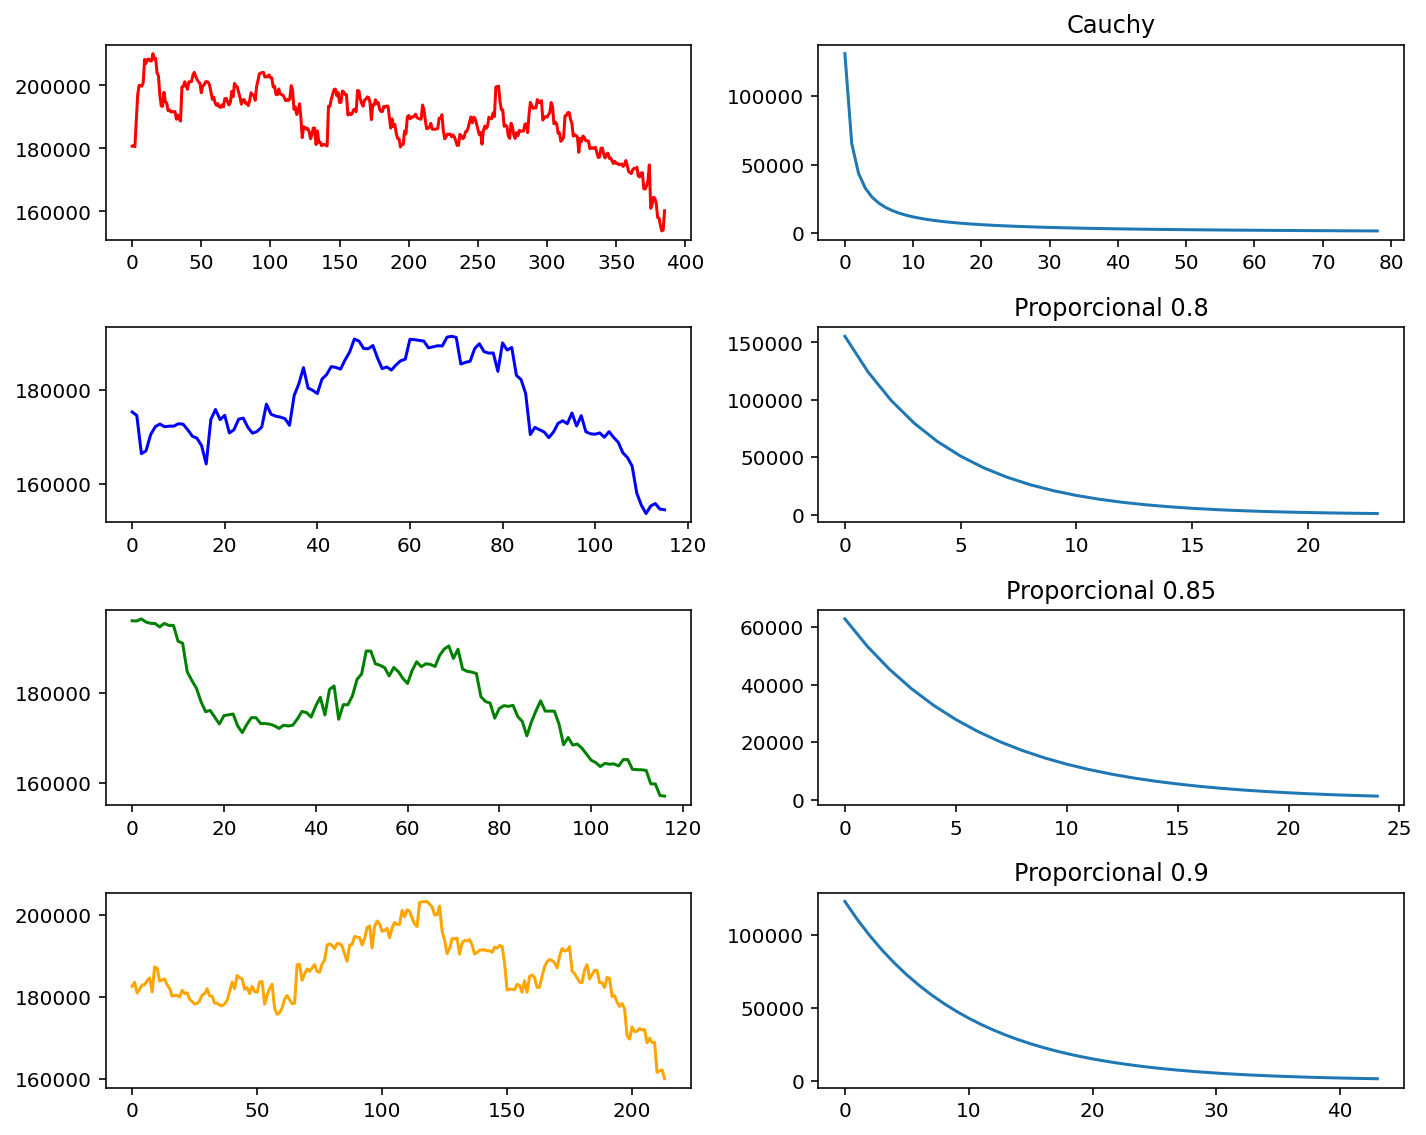

In [117]:
import matplotlib.pyplot as plt

colores = ['red', 'blue', 'green', 'orange']

costos = [sol1[2], sol2[2], sol3[2], sol4[2]]
temps = [sol1[3], sol2[3], sol3[3], sol4[3]]

plt.figure(figsize=(10, 8))

titulos = ["Cauchy", "Proporcional 0.8", "Proporcional 0.85", "Proporcional 0.9"]

for i, costo in enumerate(costos):
    plt.subplot(4, 2, (2*i)+1)
    plt.plot(costo, color=colores[i])
    plt.subplot(4, 2, (2*i)+2)
    plt.plot(temps[i])
    plt.title(titulos[i])

plt.tight_layout()
plt.show()

Aplicando enfriamiento con Cauchy y el descenso proporcional con diferentes alfas notamos una bajada notable del número de iteraciones necesarias hasta converger, y con unos resultados igualmente buenos.


In [102]:
x=[[] for _ in range(6)]
for i in range(50):
    s = SA_Mejora1()
    x[0].append(s[1])
    s = SA_Mejora1(a = 0.08)
    x[1].append(s[1])

In [106]:
for i in range(50):
    s = SA_MejoraCauchy()
    x[2].append(s[1])
    s = SA_MejoraProporcional(alf=0.8)
    x[3].append(s[1])
    s = SA_MejoraProporcional(alf=0.85)
    x[4].append(s[1])
    s = SA_MejoraProporcional(alf=0.9)
    x[5].append(s[1])

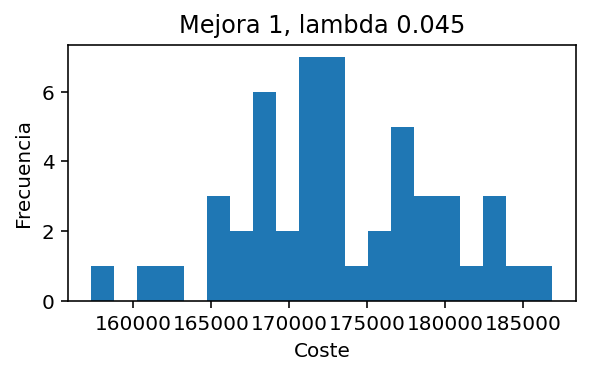

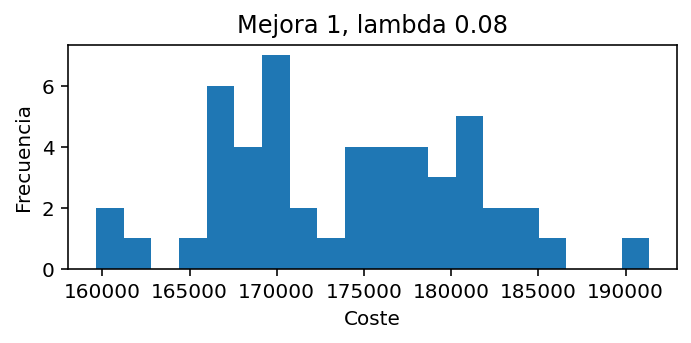

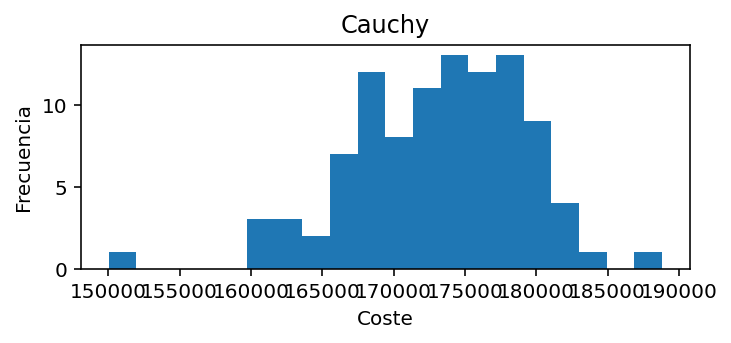

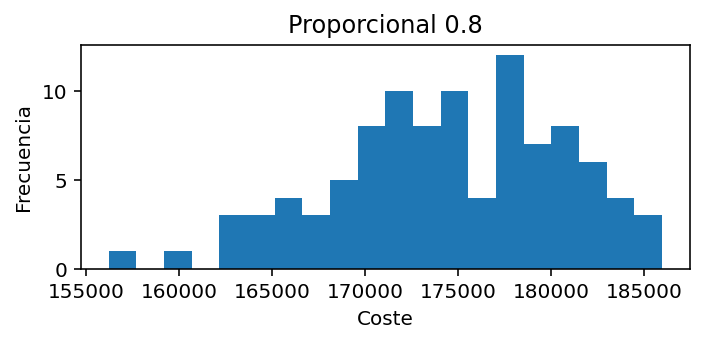

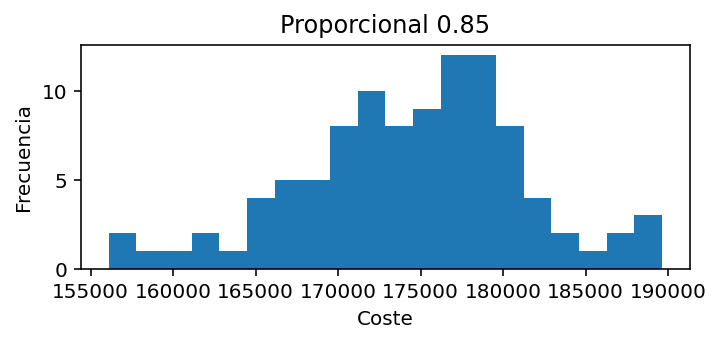

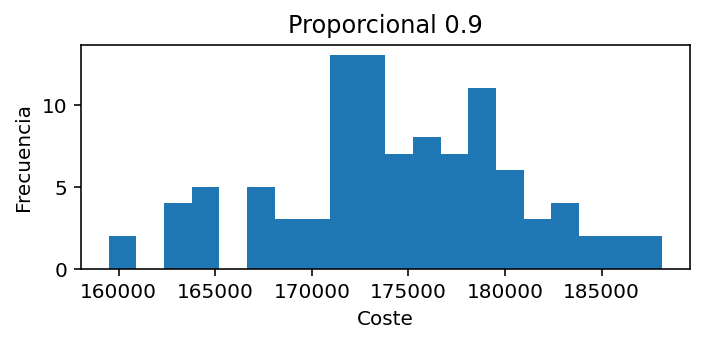

<Figure size 864x504 with 0 Axes>

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

titulos=["Mejora 1, lambda 0.045", "Mejora 1, lambda 0.08", "Cauchy", "Proporcional 0.8", "Proporcional 0.85", "Proporcional 0.9"]

for i, eqss in enumerate(x):
    plt.subplot(3, 2, i+1)
    plt.hist(eqss, bins=20)
    plt.xlabel('Coste')
    plt.ylabel('Frecuencia')
    plt.title(titulos[i])
    plt.show()
    
plt.tight_layout()
plt.show()

Con estos histogramas, podemos ver facilmente que con la mejora 1 y lambda=0.8 (con descenso exponencial decreciente), la tendencia es hacia soluciones de costes más elevados, y por tanto peores. Aquella en la que hay mayor proporción de resultados mejores son la mejora con el descenso proporcional con alfa=0.85. 
La mejora con el enfriamiento de Cauchy obtuvo en este caso soluciones de coste bajo, sin embargo, tiene mayor proporción de soluciones peores.
En general, podemos afirmar que la que mejores resultados obtiene es la mejora con descenso proporcional con alfa=0.85


#### Respuestas a los ejercicios (10 puntos)

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
Las respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta, organizadas en celdas de tal forma que sea un documento fácil de leer y seguir.

*P1.1: Implementación básica* (5 puntos)

<ins>La implementación básica se evaluará mediante un cuestionario automático de evaluación. </ins> Este lo realizarás en la primera sesión de la próxima práctica, y se centrará en la resolución por tu parte de diversas cuestiones prácticas relacionadas con la implementación realizada, pudiendo ser necesaria la ejecución, adaptación y modificación de la misma. 

Aclaración: Independientemente del cuestionario automático de evaluación, siempre considera que las preguntas planteadas en el notebook deben ser respondidas también. Esas preguntas generales están diseñadas para formarte, y te servián para razonar y reflexionar sobre el tema, así como también para fomentar una discusión constructiva con los docentes en caso de dudas.

*P1.2: Implementación mejoras* (5 puntos)

Pregunta 4 (MAX. 1200 palabras)

La evaluación de esta parte se llevará a cabo en términos de la completitud y correctitud del laboratorio implementado, y la calidad del propio informe, que debe ser conciso y preciso, pudiendo acompañarse de gráficas y tablas que faciliten y fundamenten la explicación e argumentación. Es muy importante explicar de manera clara, precisa y fundamentada. Se valorará más positivamente las intervenciones de mejora que tengan mayor dificultad de implementación que las triviales. Se reservará hasta un punto que se asignará en términos de la calidad de la mejor solución obtenida entre el conjunto de las prácticas entregadas (es por ello que no debes olvidar marcar en tu informe muy claramente cuál ha sido tu mejor solución y con qué configuración/versión). 

❓ **Pregunta 2**. ¿Siempre obtienes soluciones óptimas en cada problema? ¿En qué proporción? Muestra cómo has realizado la verificación y explica brevemente los resultados obtenidos.

No siempre obtenemos la solución óptima en cada problema puesto que se trata de una metaheurística, pero sí que obtenemos una proporción de resultados óptimos en conjunto, soluciones suficientemente buenas.

Para saber en qué proporción devuelve los mejores resultados, se ejecutó el algoritmo 100 veces para cada conjunto de datos. Con esto obtenemos que para las 8 ciudades gallegas conseguimos resultados óptimos alrededor del 30% de las veces. Sin embargo, para las 120 ciudades de USA, este porcentaje se reduce hasat el 5-10%. Esto sucede porque el espacio de búsqueda es más grande, y con la temperatura inicial especificada, cae en mínimos locales.

Se han representado los resultados obtenidos en dos histogramas. En el de las ciudades de USA podemos ver que el resultado es parecido al de una campana de Gauss, con una probabilidad baja de que de las peores soluciones, pero también las mejores. 
En el caso del histograma de las 8 ciudades, es más difícil ver una tendencia, pero hay muchas más soluciones óptimas.

También se ha realizado esta prueba para el algoritmo de Temple Simulado modificado para calcular la temperatura inicial en base a dos parámetros, y podemos ver mejoras notables, sobre todo en las 120 ciudades, ya que el porcentaje de resultados óptimos aumenta hasta cerca del 30%. En el histograma podemos ver que aunque sigue teniendo forma de campana de Gauss, esta se ve desplazada hacia de izquierda, lo que significa que aumenta el número de veces que obtenemos las mejores soluciones

❓ **Pregunta 3.1**. Confecciona una tabla que muestre la relación de 𝐶(𝑆0), 𝜙 y 𝜇 con T0 para los dos problemas utilizados anteriormente (ciudades gallegas y ciudades USA). Entonces, amplia de manera razonada la tabla con variaciones de 𝜙 y 𝜇 para cada uno de los problemas. ¿Qué combinación de 𝜙 y 𝜇 da mayor/menor T0?

Los valores fijos independientes del problema para la temperatura inicial  no es muy conveniente porque dependiendo de lo que se esté tratando, el mismo valor puede ser demasiado alto o demasiado bajo

Por eso debe ser proporcional al tamaño del problema, lo que se hace a través de C(S0).
Además, hay que tener en cuenta otros factores, como la magnitud del empeoramiento permitido (mu), y la probabilidad de que se acepte una solución peor (phi)

$$
T_0 = \left(-\frac{\mu}{\ln(\phi)}\right) \cdot C(S_0)
$$

T0 según la fórmula utilizada es directamente proporcional a C(S0) y a mu. Con phi tiene una relación dependiente del logaritmo neperiano. Como se trata de una probabilidad, el valor de phi siempre va a estar entre 0 y 1, por lo que su logaritmo siempre va a ser negativo. Este símbolo negativo se anula con el otro de la fórmula. Por tanto, a medida que phi disminuye, el valor de T0 también lo hace.

Siguiendo esta lógica, para conseguir un valor más alto de T0 tenemos que asignarle valores altos a phi y mu, y al contrario.

In [25]:
from tabulate import tabulate

# Definir los encabezados y datos de la tabla
encabezados = ["Coste inicial", "phi", "mu", "T0"]

datos = []
for p in phis:
    for m in mus:
        aux = ["", p, m, f"{temperatura_ini(c8, p, m):.4f}"]
        datos.append(aux)
datos[0][0] = c8
for p in phis:
    for m in mus:
        aux = ["", p, m, f"{temperatura_ini(c120, p, m):.4f}"]
        datos.append(aux)
datos[16][0] = c120

# Imprimir la tabla con el estilo "pretty"
tabla = tabulate(datos, headers=encabezados, tablefmt="pretty")
print(tabla)


+--------------------+-----+-------+-------------+
|   Coste inicial    | phi |  mu   |     T0      |
+--------------------+-----+-------+-------------+
| 723.9515755342773  | 0.8 |  0.2  |  648.8662   |
|                    | 0.8 | 0.075 |  243.3248   |
|                    | 0.8 | 0.05  |  162.2166   |
|                    | 0.8 | 0.005 |   16.2217   |
|                    | 0.5 |  0.2  |  208.8883   |
|                    | 0.5 | 0.075 |   78.3331   |
|                    | 0.5 | 0.05  |   52.2221   |
|                    | 0.5 | 0.005 |   5.2222    |
|                    | 0.3 |  0.2  |  120.2605   |
|                    | 0.3 | 0.075 |   45.0977   |
|                    | 0.3 | 0.05  |   30.0651   |
|                    | 0.3 | 0.005 |   3.0065    |
|                    | 0.1 |  0.2  |   62.8816   |
|                    | 0.1 | 0.075 |   23.5806   |
|                    | 0.1 | 0.05  |   15.7204   |
|                    | 0.1 | 0.005 |   1.5720    |
| 190217.21472304434 | 0.8 |  0

❓ **Pregunta 3.2**. Escoge 4 combinaciones variadas de parámetros (incluidos los que regulan el mecanismo de enfriamiento, e.g., 𝜆). Ejecuta el algoritmo de Temple Simulado con esas combinaciones. Guarda los resultados en una celda, y discute los resultados obtenidos en cuanto a la calidad de las soluciones obtenidas.

Los parámetros que configuran el comportamiento del Temple Simulado son phi y mu para el cálculo de la temperatura inicial; lambda como parámetro de la función de emnfriamiento, que en esta implementación es un mecanismo exponencial decreciente; y L, que regula la velocidad de enfriamiento.

A la hora de la elección de mu, si el valor es muy bajo se caerá en mínimos locales; mientras que si es muy alto se permitirá un mayor empeoramiento, lo que puede dificultar que el algoritmo converja.
Para phi optaremos por un valor más alto, puesto que queremos que al principio se acepte casi cualquier transición.

Para las combinaciones de parámetros hemos elegido como lambdas 0.055 y 0.001. La primera causa un enfriamiento muy rápido, y la segunda uno muy lento. Además, para cada una hemos establecido una velocidad de enfriamiento L=1 y L =50. Aumentando L conseguimos disminuir la velocidad a la que enfría la temperatura.
Además, para los casos de enfriamiento muy rápido (lambda = 0.055, L=1) y de enfriamiento muy lento (lambda=0.001, L=50), se ha forzado a que la temperatura inicial sea más alta y más baja, respectivamente. Esto lo hemos echo mediante los valores de phi y mu. Para los casos intermedios se han conservado unos valores de phi y mu estables.

Cada caso lo hemos ejecutado 11 veces, y se ha elegido y representado aquella ejecución que ha devuelto la solución de menor coste de todas ellas para cada caso. Estas serán las ejecuciónes que compararemos a continuación.

Un dato a comentar es que en los casos 2 y 4, el número de soluciones generadas es 50 veces mayor que para los casos 1 y 3, puesto que contamos con un bucle de 50 iteraciones de generación y aceptación o no de soluciones sin enfriamiento, contenido dentro del bucle exterior de 1000 iteraciones con enfriamiento. 

En las gráficas podemos ver que en el caso de partir de una temperatura más elevada y con un enfriamiento muy rápido, el número de soluciones aceptadas es mucho menor que en los otros casos, con menos de 80 frente a los otros casos, en los que van de 520 a casi 2000. Sin embargo, si tenemos en cuenta el dato anterior (para las gráficas 2 y 4 se han generado 50.000 posibles soluciones), el porcentaje de aceptación del primer caso es de un 7.5%, mientras que en el caso 2 de un 5% y en el caso 4 de un 1.1%.

Este porcentaje de aceptación tan bajo para el último caso se debe a que a pesar de que el enfriamiento es muy lento, partimos de una temperatura más baja que en los otros casos, lo que disminuye la probabilidad de aceptación de una solución peor que la actual. Además, se puede ver en la gráfica que los casos de empeoramiento aceptados nunca son con mucha diferencia de coste, lo que resulta en que es el caso en el que la peor solución encontrada tiene el coste más bajo. En general, la combinación de estos parámetros resulta en bastante poca exploración, centrándose en la explotación de las regiones conocidas.

De vuelta al caso 1, de las soluciones aceptadas, la mayor parte de las aceptadas peores se concentra al principio de la ejecución, en las 10 primeras, cuando la temperatura aún está suficientemente alta como para que la probabilidad de aceptación de peores con una diferencia de coste grande sea suficientemente alta. Como el enfriamiento es muy rápido, la probabilidad de aceptación de peores va disminuyendo, con lo que a medida que avanza prácticamente sólo acepta algunas en las que la diferencia de coste no es mucha. En ese caso tenemos exploración al principio de la ejecución, que da paso a una mayor explotación más adelante.

En cuanto al caso 3, partiendo de una temperatura intermedia, con un enfriamiento lento y, al igual que en el anterior, con 1000 iteraciones, podemos darnos cuenta de que el porcentaje de soluciones generadas aceptadas es de casi el 100%. Aquí, a pesar de que la temperatura se enfría tras cada iteración, el enfriamiento es muy leve, por lo que durante la ejecución no le da tiempo a enfriarse lo suficiente como para disminuir de manera notable la probabilidad de aceptación de soluciones peores. Por eso, sigue explorando el espacio de soluciones hasta prácticamente el final, sin explotar cada zona. Esto resulta en ser el caso que devuelve la solución final con el coste más elevado, es decir, la peor.

Finalmente, la combinación de parámetros que ha devuelto la mejor solución ha sido el caso 2, que parte de una temperatura intermedia y que enfría de manera rápida cada 50 soluciones generadas, aceptadas o no. Durante la primera mitad de este podemos ver que hay varios picos bruscos en los que se aceptan soluciones peores, con lo que realiza una buena exploración del espacio de soluciones. A medida que avanza, la temperatura se va enfriando más y más, aceptando muchas menos soluciones peores y dedicándose sobre todo a explotar las zonas presentes. Esto es lo que hace que esta combinación sea la mejor de las elegidas, lo que se ve representado en las soluciones finales. 

❓ **Pregunta 4**. Implementa un laboratorio para evaluar el impacto de las mejoras consideradas. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? ¿Cuáles no parecen haber funcionado tan bien como esperabas y por qué?  Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas o no para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.



Tras analizar las versiones de la primera parte de esta práctica, se implementarán diferentes mejoras modificando diferentes aspectos del algoritmo del Temple Simulado. A continuación se explicarán las diferentes modificaciones y sus resultados.

1) Valor inicial de T0: phi y mu

Para establecer el valor inicial de T0, utilizaremos la fórmula $T0 = \frac{-\mu}{\ln(\phi)} C(S0)$ dependiente de $\mu$  y  $\phi$. 

Trabajaremos con el conjunto de datos de 120 ciudades. En este, conocemos que el coste de las "peores" soluciones ronda los 210.000, sería el Cmax. Como la solución incial S0 va a ser elegida aleatoriamente, podemos calcular la magnitud de empeoramiento del coste que correspondería pasar de esta S0 a una de las peores. Esto lo podríamos hacer como $\frac{Cmax - C(S0)}{C(S0)}$ para establecer este valor como mu. 

Queremos que al principio de la ejecución se acepten la mayor parte de las soluciones generadas, por lo que phi debe ser un valor elevado. Utilizaremos phi=0.8, con lo que partiremos de un 80% de probabilidades de que se acepte una solución con coste de 210.000, por cómo hemos establecido mu.

2) Mecanismo de enfriamiento

En cuanto a mecanismos de enfriamiento, existen múltiples. Anteriormente estabamos utilizando un mecanismo exponencial decreciente, con un parámetro lambda para controlar la rapidez de enfriamiento con este mecanismo. Con el aumento del valor de este parámetro se puede conseguir un enfriamiento más rápido. También se podría optar por otros como el descenso constante, proporcional, con temperaturas fijadas, según el criterio de Boltzmann, el esquema de Cauchy u otras variaciones.

3) Velocidad de enfriamiento

La velocidad de enfriamiento (L(T)) debe ser lo suficientemente grande como para que el sistema alcance su estado estacionario para esa temperatura, es decir, para que el sistema se estabilice en un mínimo de la función a una cierta temperatura. 

Para valores demasiado pequeños (que corresponden a una velocidad alta de enfriamiento), el sistema podría no llegar a alcanzar el estado estacionario para una temperatura antes de que continúe disminuyendo, con lo que no tendría tiempo suficiente para explotar el espacio de soluciones a esa temperatura, y podría quedarse atrapado en una fase de exploración demasiado prolongada sin concentrarse en la explotación de soluciones de alta calidad.

En las implementaciones anteriores de la práctica hemos fijado un valor fijo para la velocidad de enfriamiento, pero esta no es la única posibilidad y puede no ser la mejor opción.

Una variante, que será la que implementemos a continuación, tomará una decisión sobre cuando es mejor finalizar la iteración actual y enfriar. Esto sucederá cuando se haya generado un cierto número de vecinos al que llamaremos max_vecinos, o bien, cuando se hayan aceptado un número máximo de vecinos, al que llamaremos max_exitos. La proporción entre estos dos valores será $max_{exitos} = 0.1 * max_{vecinos}$.

4) Criterio de parada

En cuanto a este aspecto, el criterio de parada se puede establecer de diferentes maneras. En las implementaciones de la primera parte de la práctica fijamos 1000 iteraciones para todos los casos, sin embargo, este criterio termina la ejecución indempendientemente de si ha convergido o no. Un criterio similar a este sería establecer un límite de tiempo para la ejecución, pero sucede el mismo problema que en el anterior.

Otro criterio podría ser al llegar a una cierta temperatura, Tf, la temperatura final. Cuando la temperatura es lo suficientemente baja, es probable que el sistema esté en un estado estacionario tras haber explorado y explotado lo suficiente el espacio de soluciones.

Luego, también se podría dar por finalizada la ejecución cuando se llegue al estado de convergencia, definido por ciertas condiciones, como cuando no haya una mejora significativa tras varias iteraciones. Esto podría ser cuando no se haya aceptado ningún vecino de los generados en la iteración actual. Esto unido a una velocidad de enfriamiento controlada por un número de vecinos y número de éxitos, se daría cuando el número de éxitos de la última iteración realizada haya sido 0. Con esta combinación, se obtendrá un equilibrio que evite malgastar recursos.

Teniendo en cuenta esto se ha implementado la funcion SA_Mejora1, que sigue el enfriamiento exponencial decreciente, que puede recibir el parámetro para establecer lambda. Con lambda=0.045 conseguimos una buena solución, pero necesita muchas iteraciones hasta converger, ealiza más exploración que explotación. Esto depende en gran medida de la velocidad de enfriamiento. A continuación vamos a ver otros mecanismos de enfriamiento. 

Lo que estamos buscando es un mecanismo de enfriamiento rápido porque partimos de una temperatura alta para que explore el espacio de soluciones, y para luego intensificar bajando la temperatura y la probabilidad de aceptar soluciones peores.

En el caso del criterio de Boltzmann no nos interesa porque para este problema el enfriamiento sería muy lento y hace que se necesiten muchas más iteraciones hasta converger, lo que conduce a un peor rendimiento.El esquema de Cauchy modificado tampoco lo utilizaremos puesto que no estamos trabajando con una temperatura final establecida.

Así pues, se ha implementado una función con el enfriamiento mediante el esquema de cauchy, y uno con descenso proporcional que recibe alfa como parámetro. 

Haciendo diferentes pruebas con las tres funciones y diferentes parámetros, vemos que con Cauchy y el descenso proporcional hay una bajada notable del número de iteraciones necesarias hasta converger y con unos resultados igualmente buenos, con lo que ahorramos tiempo y recursos. Con el descenso proporcional, a medida que aumentamos alfa, la tempratura disminuye de manera más rápida.

<img src=".Practica1_TempleSimulado.ipynb.upload/mej1.png" style="max-width:50%" />
<img src=".Practica1_TempleSimulado.ipynb.upload/mejsss.png" style="max-width:50%" />

Comparando la distribución de costes de las soluciones obtenidas en histogramas, podemos ver facilmente que con la mejora 1 y lambda=0.8 (con descenso exponencial decreciente), la tendencia es hacia soluciones de costes más elevados, y por tanto peores. Aquella en la que hay mayor proporción de resultados mejores son la mejora con el descenso proporcional con alfa=0.85. 

<img src=".Practica1_TempleSimulado.ipynb.upload/Captura desde 2023-10-09 00-10-00.png"   width="1092px"  height="362px"  style="object-fit:cover"/>

La mejora con el enfriamiento de Cauchy obtuvo en este caso soluciones de coste bajo, sin embargo, tiene mayor proporción de soluciones peores.
En general, podemos afirmar que la que mejores resultados obtiene es la mejora con descenso proporcional con alfa=0.85, ya que se establece un equilibrio puesto que consume pocos recursos y tiempo, encontrando regiones del espacio de buena calidad y devolviendo resultados suficientemente buenos. 

